# Car Prices Prediction 
### 1.1 Introduction
If we look at car companies, we see that they set different prices of cars based on a few set of factors such as horse power and other parameters. If a new company is planning to invest in manufacturing cars, it would be really useful for the company to understand some of the factors that affect the prices of the car respectively. It would be really useful if we are able to use machine learning in the prediction of the prices of cars and also predict the prices of different cars. With the help of machine learning and data science, it is possible to explore some useful insights about the car prices and other important features for the manufacture of the cars respectively. Once we understand that data, we would be able to provide insights to new companies that are willing to invest in the manufacture of different cars respectively. 

### 1.2 Metrics 
1. Mean Squared Error (MSE)
2. Mean Absolute Error (MAE)

### 1.3 Source

The data which is used can be downloaded from the repository. This is a fun data to work with and we would be coming through some of the key insights that would help us get the predictions for different cars.  

https://www.kaggle.com/CooperUnion/cardataset

There are some cars such as Bugatti and Lamborghini whose prices are beyond what an average Joe would be willing to buy. There are many other affordable car brands such as Ford and Toyota. The exploration of the data that we are about to work with will give us a very good idea about all the cars and their average prices for a particular car brand. We would be working with the data that contains the most accurate information about cars and so on. 

We would start by reading the data and then, visualizing the plots followed by using various machine learning algorithms for predicting the prices of cars. Moreover, we would be comparing those machine learning algorithms and check the best algorithm and use it for predictions for new cars that we are about to enter. So without much delay, let's go!



-----------------------------------------------------------------------------------------------------------------------------

### 1.4 Importing libraries
We would be importing some of the libraries for understanding the data, visualizing and getting a good idea about the machine learning models. Below are some of the libraries that would be imported. 

In [5]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler 
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.tree import DecisionTreeRegressor
import missingno as msno
from sklearn.utils import shuffle 
from category_encoders import TargetEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
sns.set(rc = {'figure.figsize': (20, 20)})
%matplotlib inline 

## 1.5 Reading the data
We would be using pandas to read the data. We would be storing that in a variable called 'data' for various calculations later. 

In [323]:
data = pd.read_csv('data/data.csv')

## 1.5 Reading the data
We would be using pandas to read the data. We would be storing that in a variable called 'data' for various calculations later. 

In [324]:
data.shape

(11914, 16)

In [325]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## 2.1 Countplot 

Countplots are used with the help of seaborn library in python. These plots give us a good understanding of the total number of elements present in a particular feature that we have considered. Below are a list of countplots for different features of interest which would help in understanding the overall distribution of data based on different features. Therefore, taking a look at these plots would ensure that one is familiar with the data along with the total number of classes for different features respectively. 

## 2.1.1 Countplot of different car companies

We would be using seaborn's countplot to check the total number of cars per company that we have in our dataset. We see that there are more than 1000 cars for the company 'Chevrolet' in our dataset. We also see that there just a few cars for companies such as 'Bugatti' and 'Genesis' which is reflective of the real-world as we don't find different models of these cars. A countplot could really give us a good understanding of the data that we are working. 

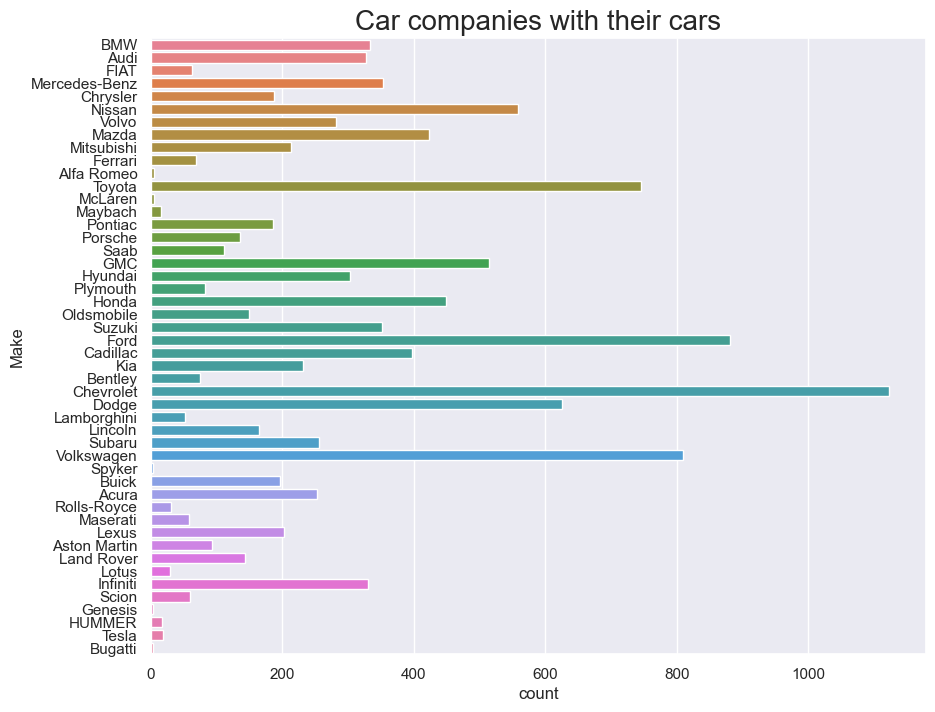

In [278]:
plt.figure(figsize = (10, 8))
sns.countplot(y = data.Make, palette='husl')
plt.title("Car companies with their cars", fontsize = 20)
plt.show()

## 2.1.2 Countplot of the total cars per different years

We would be checking the total number of cars per year just to understand the data. We find that there are many cars in the years 2015 to 2017 compared to the other years in our dataset. From this visualization, we can get an understanding that most of our data contains recent values. This is a good dataset as we are more interested in the prices of the future cars. It would be better if we have the most recent values as they would help us well in our predictions. 

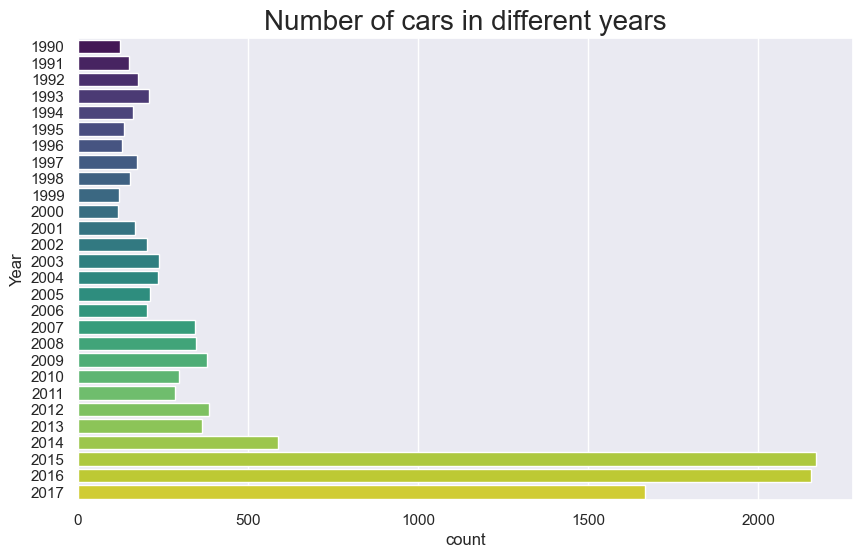

In [280]:
plt.figure(figsize = (10, 6))
sns.countplot(y = data["Year"], palette = 'viridis')
plt.title("Number of cars in different years", fontsize = 20)
plt.show()

## 2.1.3 Counting the cars based on transmission type

We are all interested in cars that are automatic as they are really easy to handle and efficient. In addition to this, most of the manual cars are being replaced by automatic cars and thus, we don't have a lot of demand for manual cars. That is being reflected here in the dataset. We see that when we see the total number of cars based on transmission type, we find that there are many automatic cars as compared to the cars that are manual. There are a few automatic_manual cars that is second option for the buyer of the cars. Thus, we could see that most of the cars that we have chosen in our dataset are automatic. 

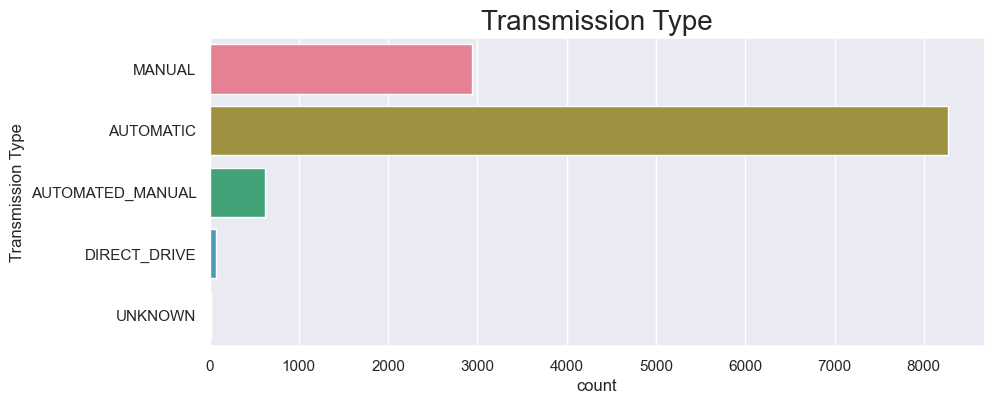

In [48]:
plt.figure(figsize = (10, 4))
sns.countplot(y = data['Transmission Type'], palette = 'husl')
plt.title("Transmission Type", fontsize = 20)
plt.show()

## Getting the unique elements from the data

We see from the below that there are a few categories for features such as 'Number of Doors', 'Vehicle Size', 'Driven_Wheels' and so on. That is what is expected as we should not have a lot of categories for the above mentioned features. In addition to this, we see that there are a few features that contain a lot of categories. Some of the features include 'Model', 'Engine HP' and so on. That is also what is expected in real life as we should have different models for cars and also different values of horsepower (hp).

In [22]:
data.nunique()

Make                   48
Model                 915
Year                   28
Engine Fuel Type       10
Engine HP             356
Engine Cylinders        9
Transmission Type       5
Driven_Wheels           4
Number of Doors         3
Market Category        71
Vehicle Size            3
Vehicle Style          16
highway MPG            59
city mpg               69
Popularity             48
MSRP                 6049
dtype: int64

In [23]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## 2.1.4 Countplot of Engine Fuel Type

We would be counting the total number of values for 'Engine Fuel Type' feature. We see that there are more than a majority of cars that have 'regular unleaded' as their category. Apart from this, there are other categories such as 'premium unleaded (required)' and 'premium unleaded (recommended)' which could also be taken into consideration. Moreover, we have a few few cars that are electric in our data. That is what is expectd as in real-life, we don't find a lot of electric cars (hope they replace our conventional cars leading to safer environment! Just kidding). 

<Axes: xlabel='count', ylabel='Engine Fuel Type'>

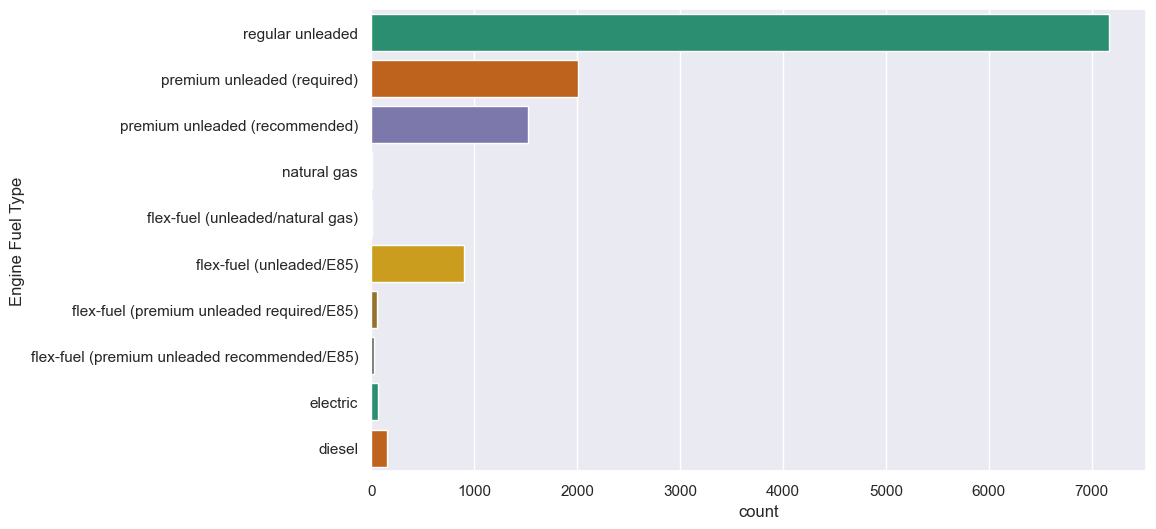

In [49]:
plt.figure(figsize = (10, 6))
sns.countplot(y = data['Engine Fuel Type'].sort_values(ascending = False), palette = 'Dark2')

## 2.1.5 Countplot of Vehicle Size 

There are mostly compact cars in our data followed by Midsize cars. There are just a few cars that are large compared to compact and midsize cars. This is typical of the real world data as we don't have a lot of cars that are large. We see a lot of cars to be compact and midsize in real life too! Great we are doing a good job selecting this data. 

<Axes: xlabel='count', ylabel='Vehicle Size'>

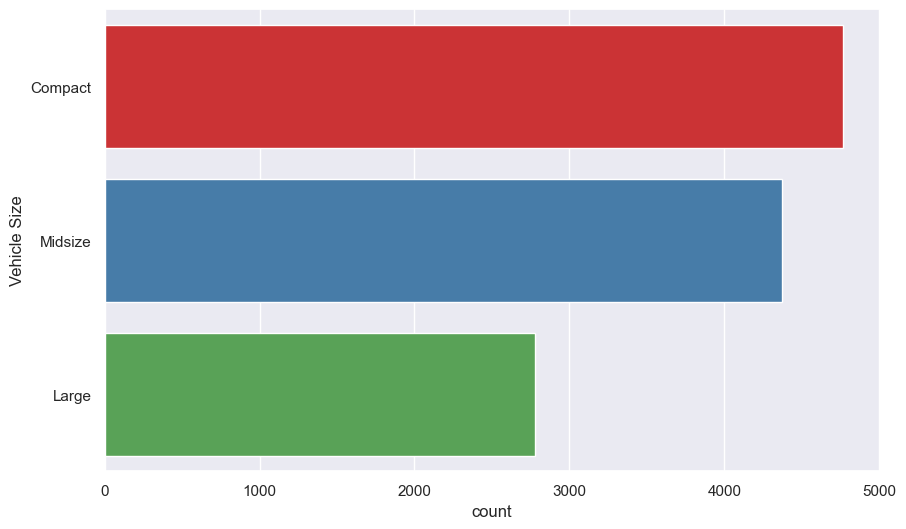

In [284]:
plt.figure(figsize = (10, 6))
sns.countplot(y = 'Vehicle Size', data = data, palette = 'Set1')

## 2.2 Missingno

We would be making the use of Missingno library from python. It is a very good graphical representation of missing values in our data. We see that there are many missing values in 'Market Category' feature. There are also a few missing values in 'Engine HP', 'Engine Cylinders' and 'Number of Doors' respectively. This library could be used to plot the missing values present in our data even when there is a huge data present. Therefore, we could use this library for understanding the missing values in our data.  

In [35]:
data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

<Axes: >

<Figure size 1000x400 with 0 Axes>

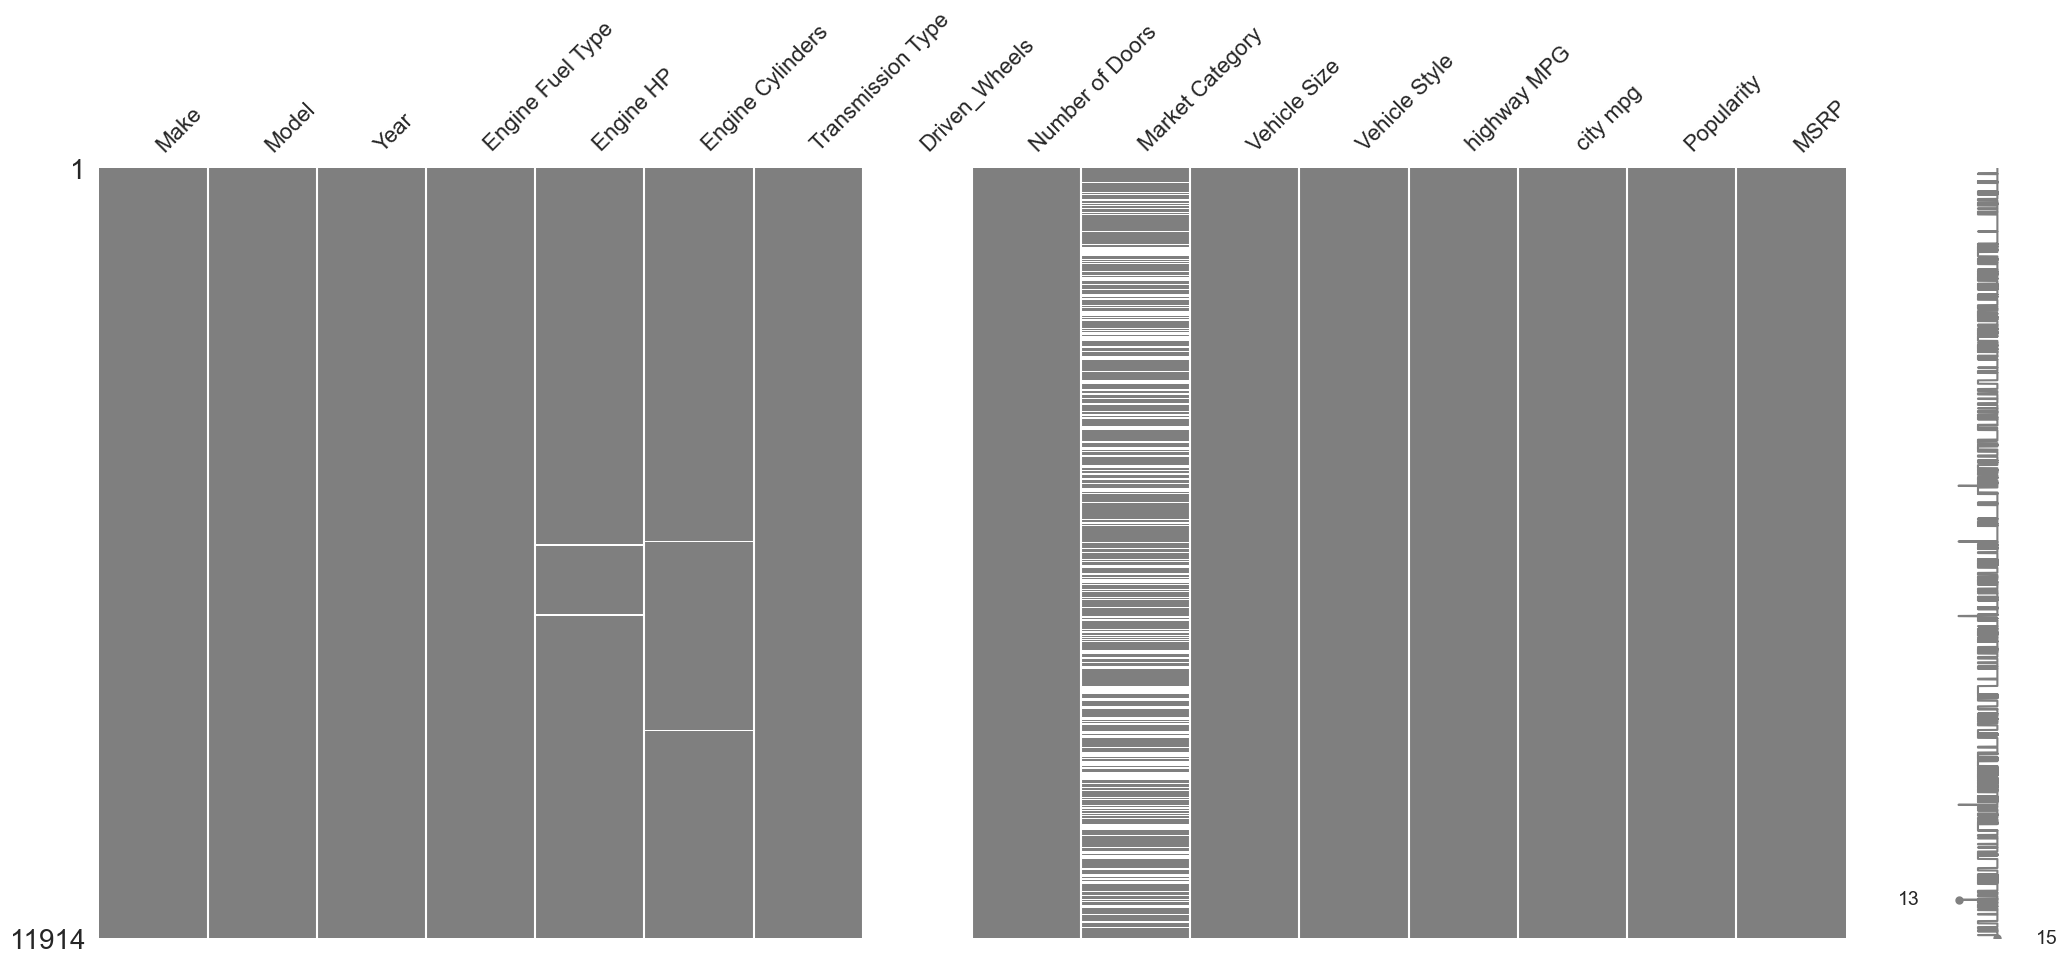

In [124]:
plt.figure(figsize = (10,4))
msno.matrix(data, color = (0.5, 0.5, 0.5))


## 2.3 Groupby 

Groupby is a good useful function in python where the values are grouped based on feature (or) features that we give to the groupby function and things such as mean, median, mode or other aggregate functions could be performed once the data values are grouped together. Below are some of the plots which are made possible with the help of groupy function in python. For demonstration, I have created a groupby table below which shows the grouping of cars based on their make. In addition to this, there are various features that I have taken after grouping the values which are "Engine HP", "Engine Cylinders", "highway MPG" and "city mpg" features respectively. 

## 2.3.1 Groupby with 'Make' feature

We would be making use of groupby which would take into consideration the feature that would be grouped on and it would perform different operations after grouping such as finding the minimum element in particular group, maximum element in a particular group and so on. Therefore, we would be making use of this in groupby as it makes life simple in python. Here, we see that we have grouped the data on the basis of 'Make' and considered a few features such as 'Engine HP', 'Engine Cylinders', 'highway MPG' and 'city mpg'. We would be then looking at the maximum values, minimum values and mean of the data. We could see a very good depiction of the result below. 

In [326]:
data.groupby('Make')[['Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg']].agg(['min', 'max', 'mean']).head()

Engine HP                    Engine Cylinders                   \
                   min    max        mean              min   max       mean   
Make                                                                          
Acura            111.0  573.0  244.797619              4.0   6.0   5.333333   
Alfa Romeo       237.0  237.0  237.000000              4.0   4.0   4.000000   
Aston Martin     420.0  568.0  484.322581              8.0  12.0  10.623656   
Audi             108.0  610.0  277.695122              4.0  12.0   5.557927   
BMW              170.0  600.0  326.907186              0.0  12.0   5.958084   

             highway MPG                 city mpg                  
                     min  max       mean      min  max       mean  
Make                                                               
Acura                 17   38  28.111111       13   39  19.940476  
Alfa Romeo            34   34  34.000000       24   24  24.000000  
Aston Martin          15   22  18.892473        9   14  12.526882  
Audi                  18  354  28.823171       11   31  19.585366  
BMW                   18  111  29.245509       10  137  20.739521

## 2.3.2 Grouping the data on the basis of Year

We would now be grouping the data on the basis of year and check the average prices of cars for the years of cars. Looking at the plot below, we see that the average prices of cars was the highest in the year 2014 followed by the year 2012. The average prices of cars that are in the year 2000 and below are pretty low as can be easily seen from the plot. On average, we also find an interesting trend. As the years increase, we could see that the average prices of cars keep increasing but not in a steady way. 

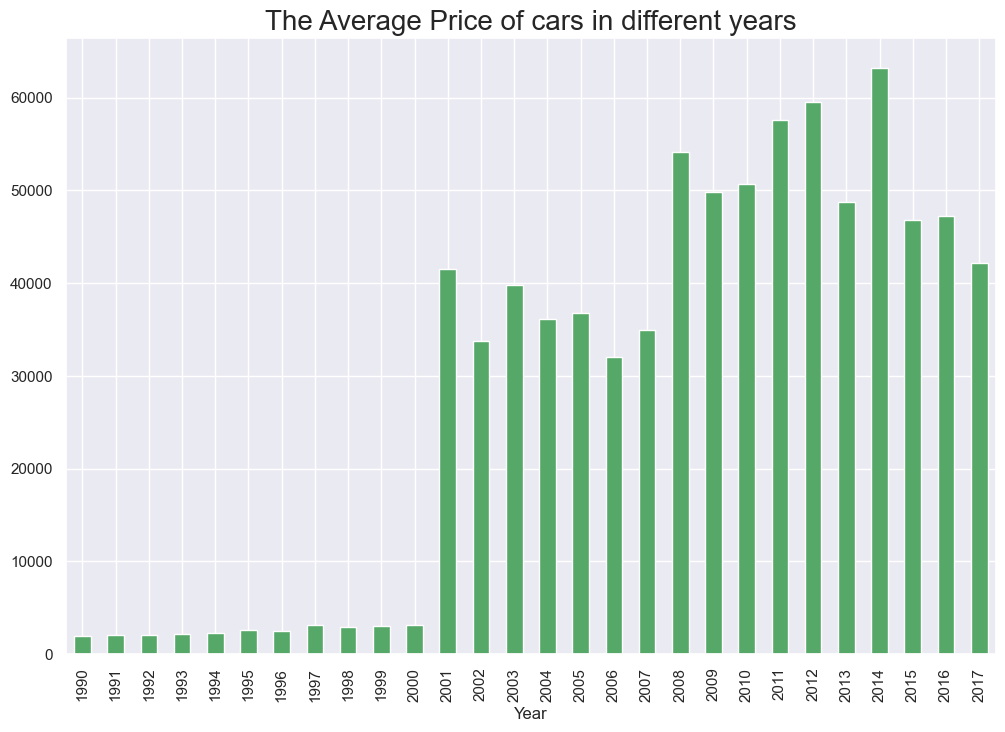

In [51]:
plt.figure(figsize = (12, 8))
data.groupby('Year')['MSRP'].mean().plot(kind = 'bar', color = 'g')
plt.title("The Average Price of cars in different years", fontsize = 20)
plt.show()


## 2.3.3 Grouping on the basis of Transmission Type

We would be grouping the data on the basis of transmission type and check the average prices of cars. We see that automated_manual cars have the highest average price. That is being followed by automatic cars. We expect the prices of cars that are manual to be low compared to the prices of cars that are automatic. That is being reflected in the graph below. 

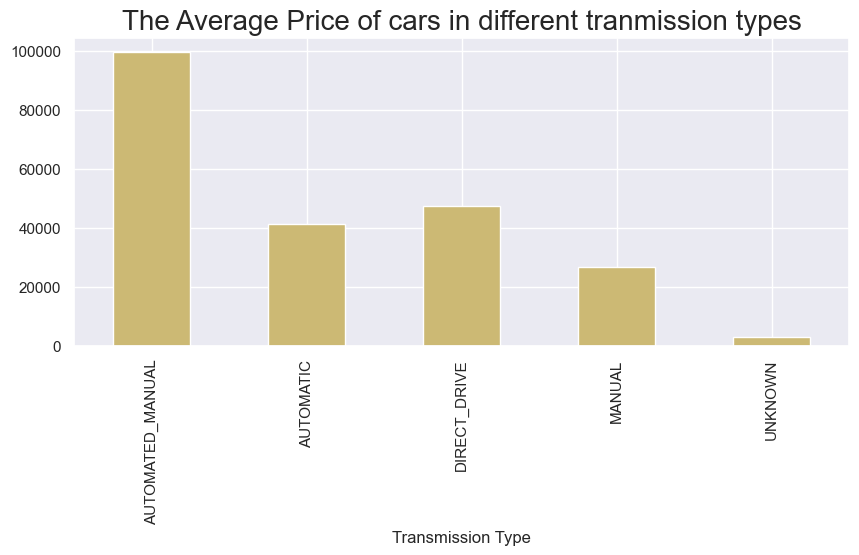

In [56]:
plt.figure(figsize = (10, 4))
data.groupby('Transmission Type')['MSRP'].mean().plot(kind = 'bar', color = 'y')
plt.title("The Average Price of cars in different tranmission types", fontsize = 20)
plt.show()


## 2.3.4 Grouping on the basis of Make with 'MSRP' values

We would now be grouping on the basis of make and check the average prices of cars of particular makes. We should surely be expecting Bugatti to the most expensive car. In fact, it is the most expensive car in the world. Hope we buy the car anytime soon! (Just kidding). We see that the average price of Bugatti Veyron is about 1.75 million dollars. It is way too expensive compared to the other cars. There are other cars such as Maybach and Rolce-Royce that are also expensive if we remove Bugatti from our list. We see that the least expensive car is Plymouth. 

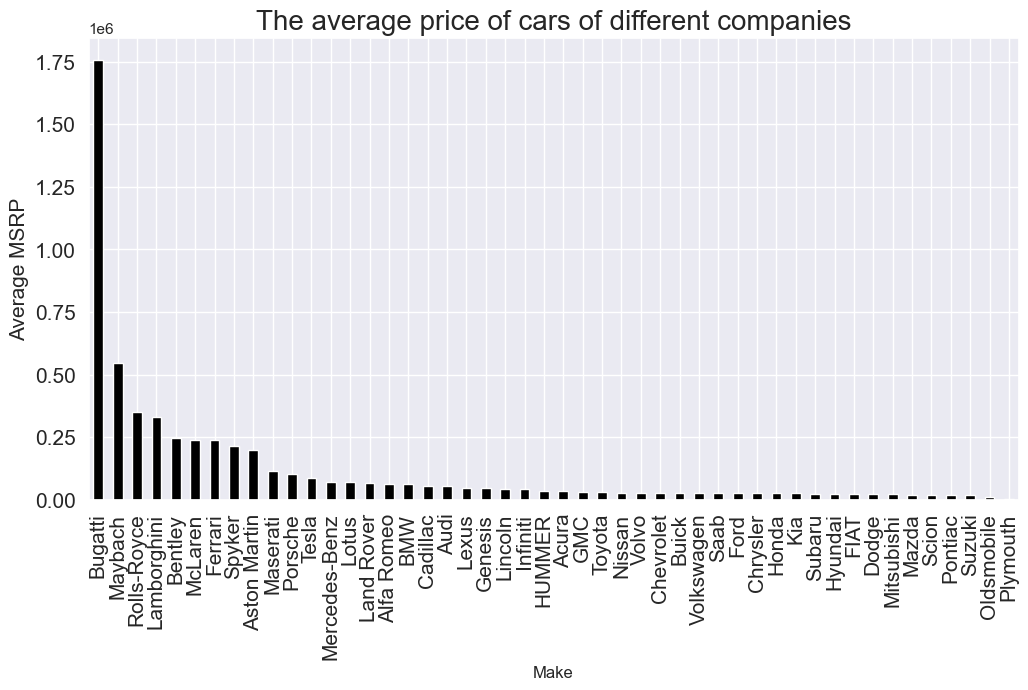

In [97]:
data['MSRP'] = pd.to_numeric(data['MSRP'], errors='coerce')
data['MSRP'] = data['MSRP'].astype(int)
# Group by Make and calculate mean MSRP
plt.figure(figsize=(12, 6))
mean_msrp = data.groupby('Make')['MSRP'].mean().sort_values(ascending=False).plot(kind='bar', fontsize=15, color='black')
plt.title("The average price of cars of different companies", fontsize=20)
#plt.xlabel("Make", fontsize=2)
plt.ylabel("Average MSRP", fontsize=15)
plt.show()

## 2.3.5 Grouping on the basis of Make with 'Engine HP' values 

We would be grouping the data on the basis of Make and consider the 'Engine HP'. We should expect Bugatti to have the highest horse power (hp). We see that in the below graph. In addition, there are other car makers such as McLaren and Maybach which also contain a good horse power (hp). Since the horse power of 'tesla' is not known, we don't have a bar depicted below. 

In [117]:
data["Engine HP"].isnull().sum()

69

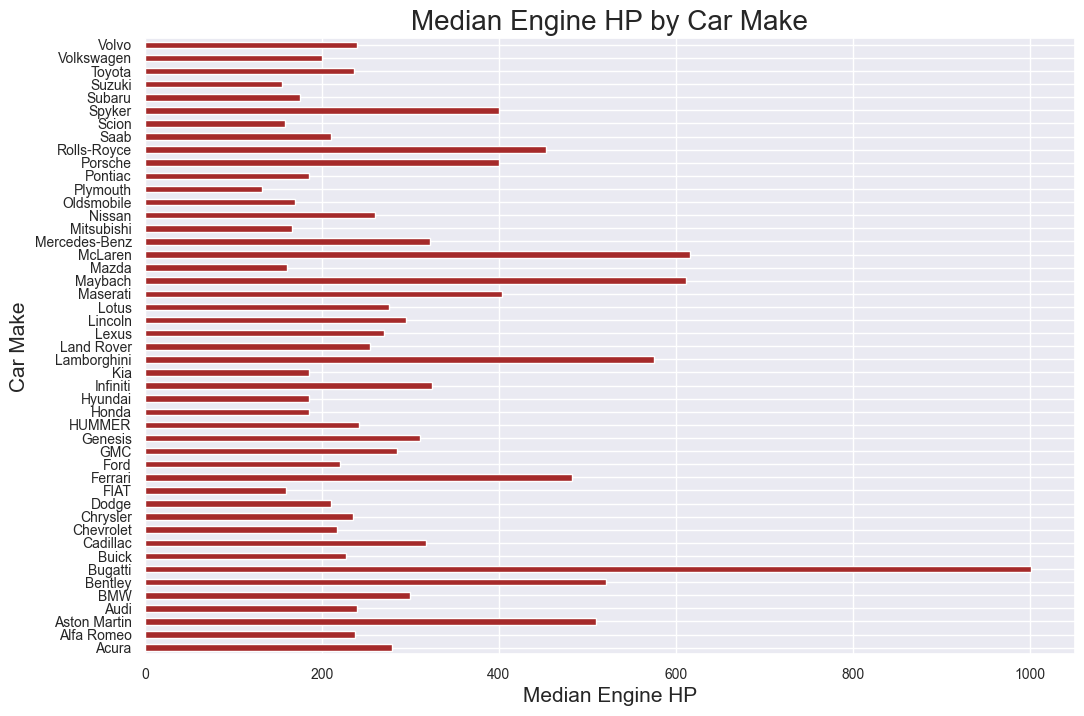

In [105]:
data['Engine HP'] = pd.to_numeric(data['Engine HP'], errors='coerce')

# Drop rows where Engine HP is NaN
data_cleaned = data.dropna(subset=['Engine HP'])

# Plot the median Engine HP by Make
plt.figure(figsize=(12, 8))
data_cleaned.groupby('Make')['Engine HP'].median().plot(kind='barh', fontsize=10, color='brown')
plt.title("Median Engine HP by Car Make", fontsize=20)
plt.xlabel("Median Engine HP", fontsize=15)
plt.ylabel("Car Make", fontsize=15)
plt.show()

## 2.3.6 Grouping on the basis of Driven Wheels

We would now be dividing the data on the basis of Driven Wheels. We would then calculate the average prices of each group. We see that the average price of 'all wheel drive' cars is the highest followed by 'rear wheel drive' cars respectively. That is what should be expected as 'all wheel drive' cars are powerful and their cost is high. The 'front wheel drive' cars on the other hand are not that expensive as they don't have a lot of power. Thus, the data is reflective of the real-world data. 

In [115]:
data['Driven_Wheels'].isnull().sum()

0

In [131]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


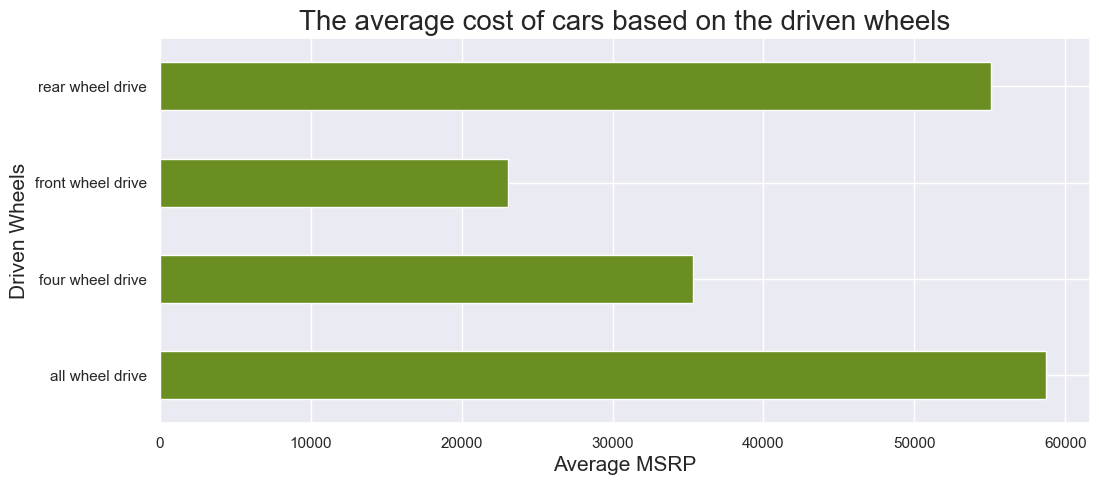

In [136]:
# Step 1: Convert 'MSRP' to numeric, coercing errors to NaN
data['MSRP'] = pd.to_numeric(data['MSRP'], errors='coerce')

# Step 2: Drop rows where 'MSRP' is NaN
data_cleaned = data.dropna(subset=['MSRP'])

# Step 3: Convert 'MSRP' to integer
data_cleaned['MSRP'] = data_cleaned['MSRP'].astype(int)

# Step 4: Plot the mean MSRP based on driven wheels
plt.figure(figsize=(12, 5))
data_cleaned.groupby('Driven_Wheels')['MSRP'].mean().plot(kind='barh', color='olivedrab')
plt.title("The average cost of cars based on the driven wheels", fontsize=20)
plt.xlabel("Average MSRP", fontsize=15)
plt.ylabel("Driven Wheels", fontsize=15)
plt.show()

## 2.3.7 Grouping on the basis of Make with 'Popularity' values

We would group the data on the basis of make and find the average popularity of different cars. We see that 'Ford' is very popular all around our data. It is being followed by 'BMW' and 'Audi' respectively. We see that there are other car makers such as 'Lincoln' and 'Genesis' that are not so popular. 'Toyota' is also a popular brand and is present in the plot below.  

<Axes: ylabel='Popularity'>

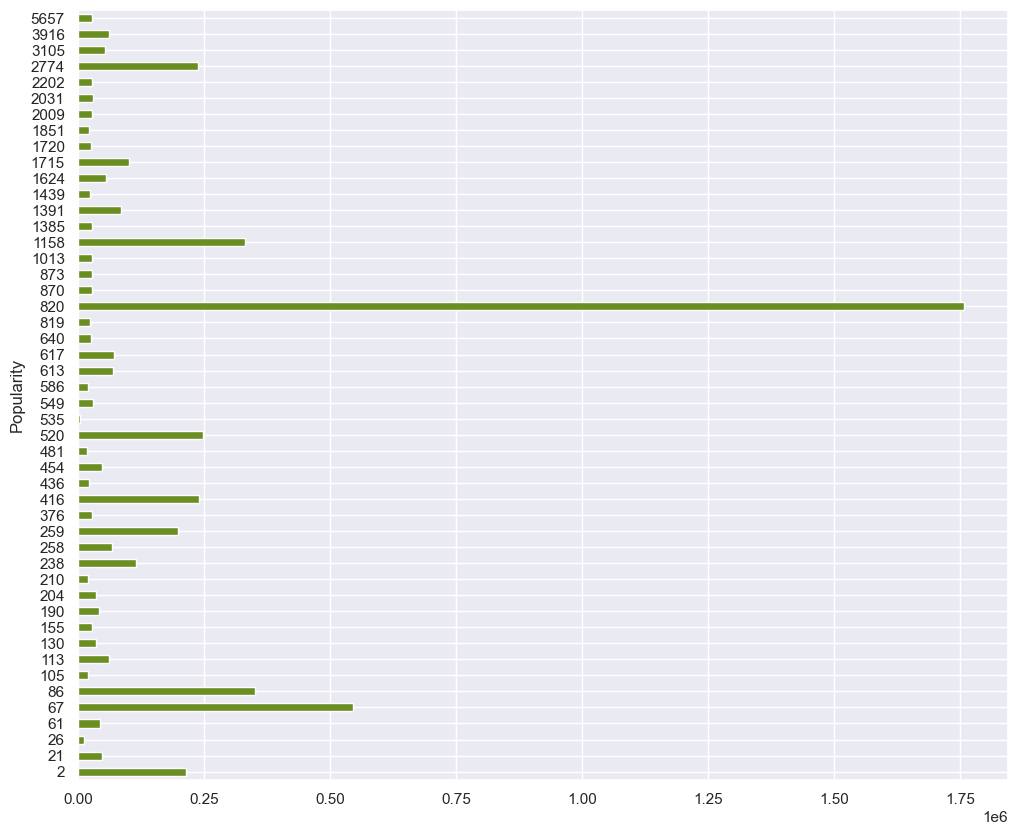

In [145]:
"""
plt.figure(figsize = (15, 15))
data_cleaned.groupby('Make').mean()['Popularity'].sort_values(ascending = True).plot(kind = 'barh', color = 'orange')
plt.yticks(fontsize = 10)
plt.title("Popularity of various car brands", fontsize = 15)
plt.show()
"""
data['MSRP'] = pd.to_numeric(data['MSRP'], errors='coerce')

# Step 2: Drop rows where 'MSRP' is NaN
data_cleaned = data.dropna(subset=['MSRP'])

# Step 3: Convert 'MSRP' to integer
data_cleaned['MSRP'] = data_cleaned['MSRP'].astype(int)

# Step 4: Plot the mean MSRP based on driven wheels
plt.figure(figsize=(12, 10))
data_cleaned.groupby('Popularity')['MSRP'].mean().plot(kind='barh', color='olivedrab')


## 2.4 Scatterplot between 'highway MPG' and 'city mpg'

We should be expecting a linear relationship between 'highway MPG' and 'city mpg' as they are very much correlated with each other. We cannot have cars, in general, that have a city mileage that is very much different from highway mileage. In the plot below, we see that there is one outlier where the highway MPG is about 350. There are no cars that have that high mileage. We can remove the outlier as it would affect our results as errors in the data are costly when performing the machine learning operations. 

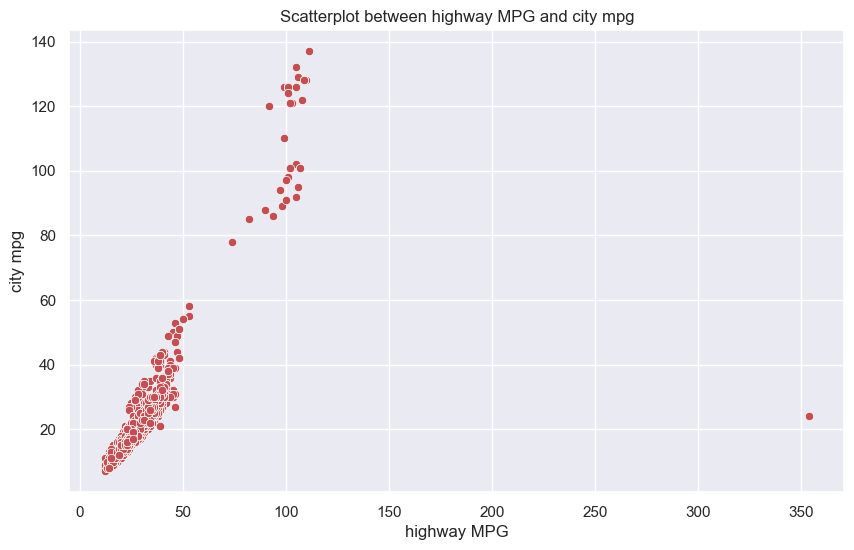

In [146]:
plt.figure(figsize= (10,6))
sns.scatterplot(x = 'highway MPG', y = 'city mpg', data = data, color = 'r')
plt.title("Scatterplot between highway MPG and city mpg")
plt.show()

We would be removing the outlier in our data where the highway MPG is about 350.

In [327]:
data[data['highway MPG'] > 350]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1119,Audi,A6,2017,premium unleaded (recommended),252.0,4.0,AUTOMATED_MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,354,24,3105,51600


In [328]:
data = data[data['highway MPG'] < 350]

We would now be using a scatterplot as the above but with removing the outliers. We see almost a linear line between the two features that we have considered and that is what is expected.

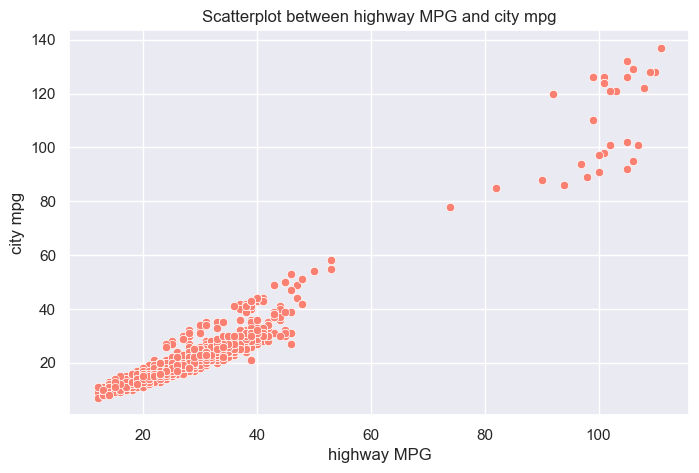

In [329]:
plt.figure(figsize=(8,5))
sns.scatterplot(x = 'highway MPG', y ='city mpg', data = data, color = 'salmon')
plt.title("Scatterplot between highway MPG and city mpg")
plt.show()

We would check all the unique values in 'Market Category'. We see that there are so many different unique values. 

In [330]:
data['Market Category'].unique()

array(['Factory Tuner,Luxury,High-Performance', 'Luxury,Performance',
       'Luxury,High-Performance', 'Luxury', 'Performance', 'Flex Fuel',
       'Flex Fuel,Performance', nan, 'Hatchback',
       'Hatchback,Luxury,Performance', 'Hatchback,Luxury',
       'Luxury,High-Performance,Hybrid', 'Diesel,Luxury',
       'Hatchback,Performance', 'Hatchback,Factory Tuner,Performance',
       'High-Performance', 'Factory Tuner,High-Performance',
       'Exotic,High-Performance', 'Exotic,Factory Tuner,High-Performance',
       'Factory Tuner,Performance', 'Crossover', 'Exotic,Luxury',
       'Exotic,Luxury,High-Performance', 'Exotic,Luxury,Performance',
       'Factory Tuner,Luxury,Performance', 'Flex Fuel,Luxury',
       'Crossover,Luxury', 'Hatchback,Factory Tuner,Luxury,Performance',
       'Crossover,Hatchback', 'Hybrid', 'Luxury,Performance,Hybrid',
       'Crossover,Luxury,Performance,Hybrid',
       'Crossover,Luxury,Performance',
       'Exotic,Factory Tuner,Luxury,High-Performance',
   

## 2.5 Boxplot 

Boxplots give us a good understanding of how the data values are spread for different features. We could get to know the 25th, 50th and 75th percentile values present in different features. In addition, the outliers could also be detected by making use of a formula and considering the interquartile range which is the difference between the 75th percentile and 25th percentile respectively.

## 2.5.1 Boxplot of highway MPG

We would now be using the boxplot of highway MPG and calculate the average values and how the distribution is spread. We see that the average values are about 25 for highway MPG and we see the maximum value being equal to about 40 and the points above that to be outliers. We see that the data is not so spread as most of the values lie between 21 and 30 respectively. 

<Axes: xlabel='highway MPG'>

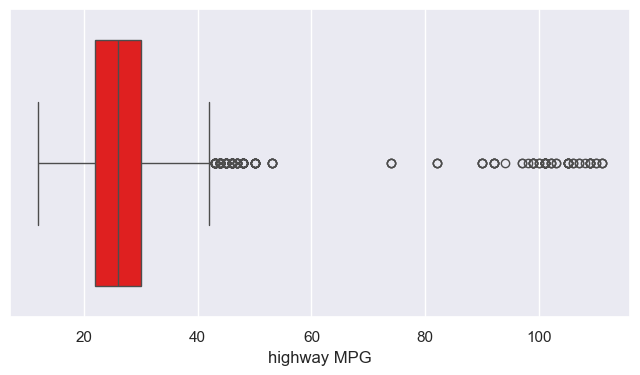

In [331]:
plt.figure(figsize=(8,4))
sns.boxplot(x = 'highway MPG', data = data, color = 'red')

## Calculating percentiles of highway MPG

We would now print the highway percentile values to get a better understanding of the outliers in our data. We see that we cannot distinguish the outliers in the below print statements. We would be using more granularity and then calculate the percentile values and spot the outliers in our data. 

In [332]:
for i in range(90, 100):
    print("The {:.1f}th percentile value is {:.2f}".format(i, np.percentile(data['highway MPG'], i)))

The 90.0th percentile value is 35.00
The 91.0th percentile value is 36.00
The 92.0th percentile value is 36.00
The 93.0th percentile value is 37.00
The 94.0th percentile value is 37.00
The 95.0th percentile value is 38.00
The 96.0th percentile value is 39.00
The 97.0th percentile value is 40.00
The 98.0th percentile value is 42.00
The 99.0th percentile value is 46.00


We see that 99.5th percentile values and so on have very high values and can be considered as outliers. Therefore, we have to remove those outliers so that they don't disturb our data and machine learning algorithms perform well with the data once the outliers are removed. 

In [333]:
for i in [x * 0.1 for x in range(990, 1000)]:
    print("The {:.1f}th percentile value is {:.2f}".format(i, np.percentile(data['highway MPG'], i)))

The 99.0th percentile value is 46.00
The 99.1th percentile value is 46.00
The 99.2th percentile value is 48.00
The 99.3th percentile value is 48.00
The 99.4th percentile value is 50.00
The 99.5th percentile value is 85.52
The 99.6th percentile value is 97.35
The 99.7th percentile value is 101.00
The 99.8th percentile value is 103.35
The 99.9th percentile value is 107.09


We would be removing the outlier values in our data. We would set the bar to be equal to about 60 respectively.

In [334]:
data = data[data['highway MPG'] < 60]

We would once again plot the boxplot and see how the values are split for highway MPG. We find that the highway MPG is more skewed towards the right. We see a lot of values to the right of the mean. What this means is that more than 50 percent of the values are above 24 (mean). 

<Axes: xlabel='highway MPG'>

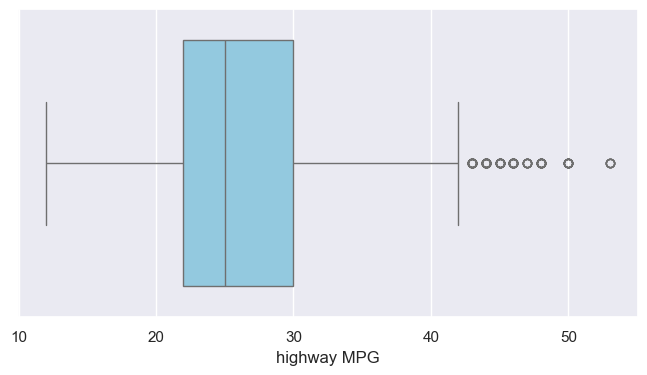

In [335]:
plt.figure(figsize=(8,4))
sns.boxplot(x = 'highway MPG', data = data, color = 'skyblue')

## 2.5.2 Boxplot of city mpg
We would do the similar above operation for 'city mpg' respectively. We also see below some outliers that might interfere in our predictions. Therefore, we would delete those values. 


<Axes: xlabel='city mpg'>

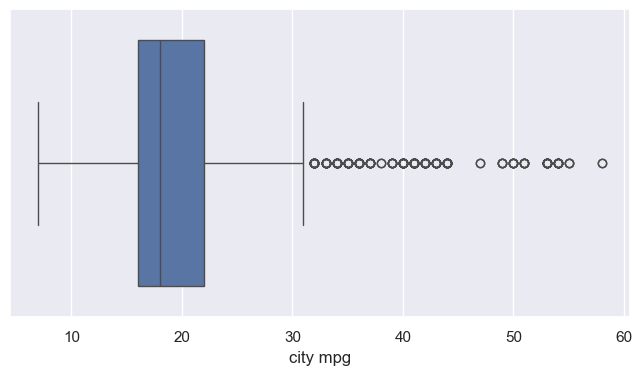

In [336]:
plt.figure(figsize=(8,4))
sns.boxplot(x = 'city mpg', data = data)

We would now be getting the percentile values and check the outliers. 

In [337]:
for i in range(90, 100):
    print("The {:.1f}th percentile value is {:.2f}".format(i, np.percentile(data['city mpg'], i)))

The 90.0th percentile value is 26.00
The 91.0th percentile value is 26.00
The 92.0th percentile value is 27.00
The 93.0th percentile value is 27.00
The 94.0th percentile value is 28.00
The 95.0th percentile value is 29.00
The 96.0th percentile value is 30.00
The 97.0th percentile value is 31.00
The 98.0th percentile value is 32.00
The 99.0th percentile value is 41.00


We would be checking the outliers and calculate their values. 

In [338]:
for i in [x * 0.1 for x in range(990, 1000)]:
    print("The {:.1f}th percentile value is {:.2f}".format(i, np.percentile(data['city mpg'], i)))

The 99.0th percentile value is 41.00
The 99.1th percentile value is 41.00
The 99.2th percentile value is 41.00
The 99.3th percentile value is 42.00
The 99.4th percentile value is 43.00
The 99.5th percentile value is 44.00
The 99.6th percentile value is 44.00
The 99.7th percentile value is 50.00
The 99.8th percentile value is 53.00
The 99.9th percentile value is 54.00


We would be removing the outlier values and put the bar equal to 40 respectively. 

In [339]:
data = data[data['city mpg'] < 40]

We would once again plot the boxplot of 'city mpg' respectively. We see again that the data is right skewed. 

<Axes: xlabel='city mpg'>

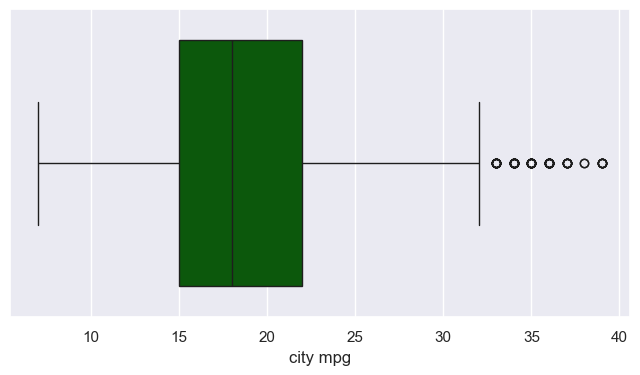

In [340]:
plt.figure(figsize=(8,4))
sns.boxplot(x = 'city mpg', data= data, color = 'darkgreen')

## 2.5.3 Boxplot of 2 features 'city mpg' and 'highway MPG' 

We would be looking at the 2 features 'city mpg' and 'highway MPG' respectively. We see that in terms of 'city mpg' most of the values that are present are in the range between 15 to 22 respectively. On the other hand, we find that most of the values that are present in 'highway MPG' are in the range 22 to 30 respectively. Therefore, we can see how the values are spread in the boxplot and see there the spread actually take place by comparing the features. 

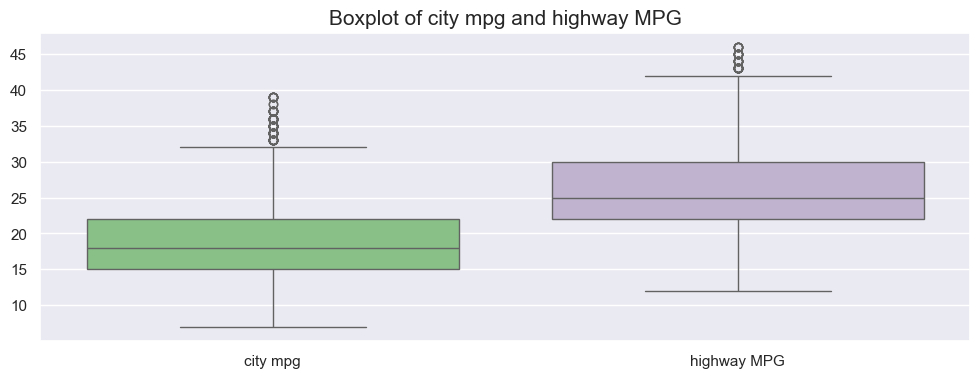

In [341]:
plt.figure(figsize = (12, 4))
sns.boxplot(data = data[['city mpg', 'highway MPG']], palette = 'Accent')
plt.title("Boxplot of city mpg and highway MPG", fontsize = 15)
plt.show()

## 2.5.4 Boxplot of 'Engine HP' 

We would be making use of the boxplot and then seeing the spread of the values 'Engine HP' and get an idea about how the values are spread. We see that most of the values of 'Engine HP' would lie between 150 to 300 respectively. The maximum value of the engine horsepower would be something like 500 while the remaining values that are higher are considered to be outliers. The boxplot also looks as though it is right skewed where there are more number of values of 'Engine HP' that are higher than the mean value of about 250 (mean) respectively. 

<Axes: ylabel='Engine HP'>

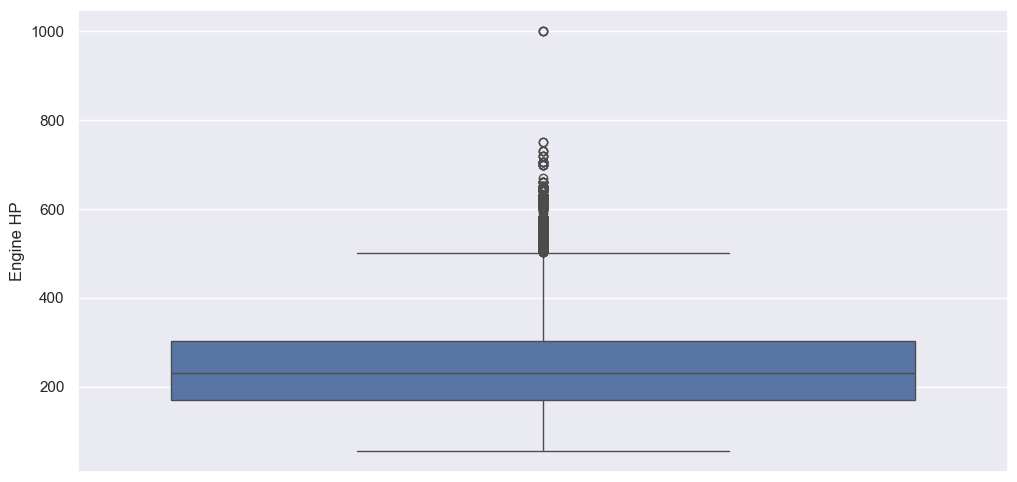

In [342]:
plt.figure(figsize = (12, 6))
sns.boxplot(data['Engine HP'])

## 2.6.1 lmplot between 'Engine HP' and 'Popularity'

We would be using lmplot and checking the relationship between 'Engine HP' and 'Popularity' respectively. We see that most of the data is not related. One thing to note, however, is that there is a linear line which has a positive slope. What this means is that with the increase in 'Engine HP', there is a higher chance of increase in 'Popularity' respectively. This need not be true in all the cases as correlation need not always be equal to causation. 

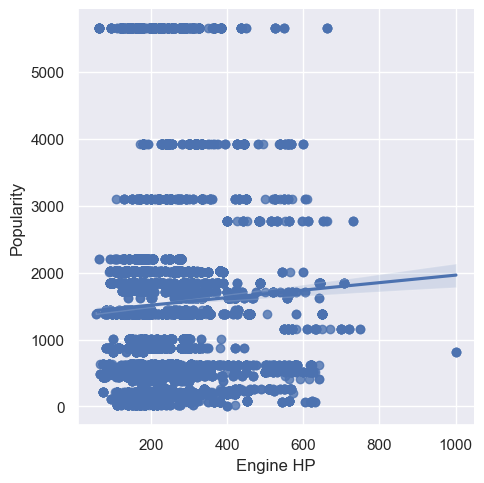

In [343]:
sns.set(rc = {'figure.figsize': (20,6)})
sns.lmplot(x = 'Engine HP', y = 'Popularity', data = data)

## 2.6.2 lmplot between 'Engine Cylinders' and 'Popularity' 

We would now be plotting the lmplot between 'Engine Cylinders' and 'Popularity' and see if there is any relationships between the parameters taken into consideration. We see that there is a relationship between the 'Popularity' and 'Engine Cylinders' and there is a positive relationship between parameters. We see that the data and the features that we have considered are correlated with each other. But that should again not be confused with causation as having higher number of 'Engine Cylinders' does not cause the car to be more popular and increase the 'Popularity'. 

<Figure size 1000x400 with 0 Axes>

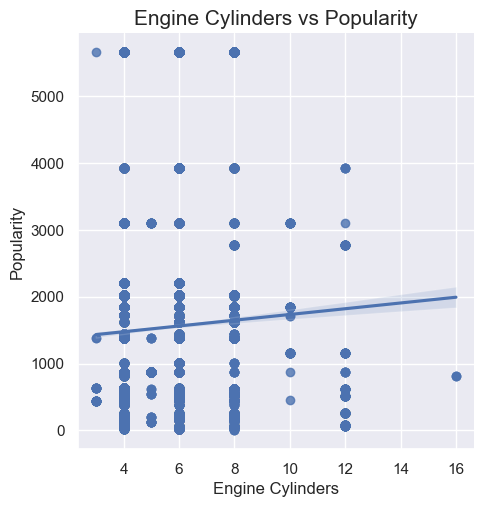

In [344]:
plt.figure(figsize = (10, 4))
sns.lmplot(x = 'Engine Cylinders', y = 'Popularity', data = data)
plt.title("Engine Cylinders vs Popularity", fontsize = 15)
plt.show()

## 2.6.3 lmplot between 'Number of Doors' and 'Popularity'
We see that there is a line that has a negative slope on the relationship between the parameters. We see that 'Popularity' and the 'Number of Doors' are not related with each other. In general, we see that the more the number of doors of the car, the less the popularity. That is true in real life as well as we see that the cars that are highly popular have just 2 doors. Some of the cars include Bugatti Veyron and Lamborghini Gallardo. Thus, this data is reflective of the real world data set that we have taken into consideration. 

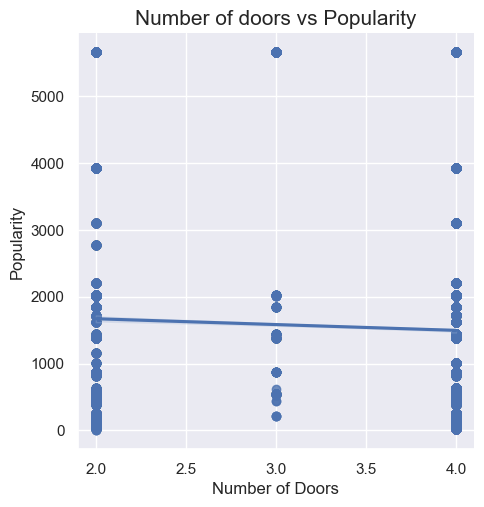

In [345]:
sns.lmplot(x = 'Number of Doors', y = 'Popularity', data = data)
plt.title("Number of doors vs Popularity", fontsize = 15)
plt.show()

## 2.6.4 lmplot between 'Engine Cylinders' and 'Engine HP' 

We see that there is a very good correlation between 'Engine Cylinders' and 'Engine HP' as can be seen from the plot below. That's the reason we gave an almost perfect linearly drawn line. Therefore, lmplot could be used to see the linear relationship or the correlation between the 2 features under consideration respectively. 

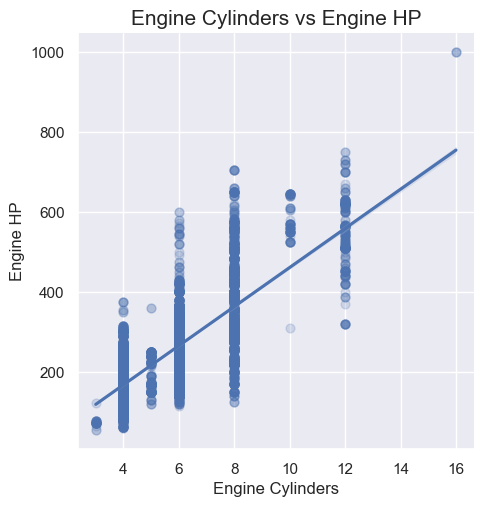

In [346]:
sns.lmplot(x = 'Engine Cylinders', y = 'Engine HP', scatter_kws = {"s": 40, "alpha": 0.2}, data = data)
plt.title("Engine Cylinders vs Engine HP", fontsize = 15)
plt.show()

## 2.6.5 lmplot between 'city mpg' and 'highway MPG'

We see that there is a linear relationship between features that we have taken into consideration. In real life, we see the same being reflected. Therefore, we are working with a real world data set as most of the features are what we find in the real-world. 

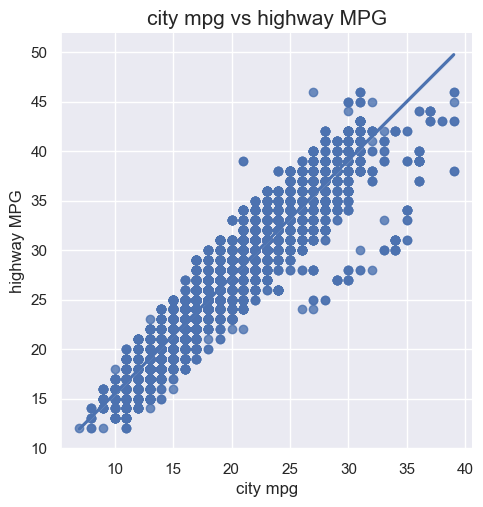

In [347]:
sns.lmplot(x = 'city mpg', y = 'highway MPG', data = data)
plt.title("city mpg vs highway MPG", fontsize = 15)
plt.show()

## 2.6.6 lmplot between 'city mpg' and 'Engine Cylinders'

We see that there is an inverse relationship between 'city mpg' and 'Engine Cylinders' respectively. That is what we typically find in real-life. We see that as there is an increase in the number of engine cylinders, there is a higher possibility for the car under consideration to be lower in terms of city mileage. That is what is being reflected in our plot. 

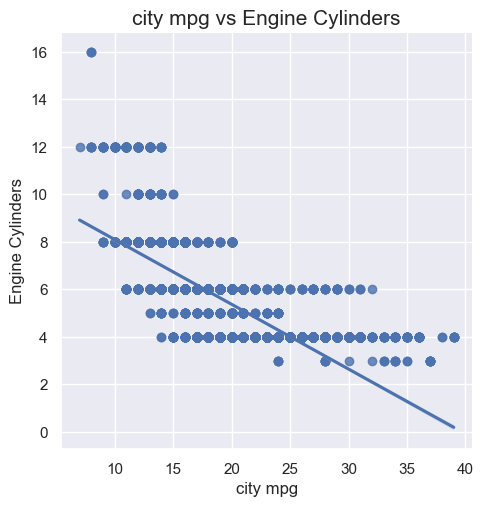

In [348]:
sns.lmplot(x = 'city mpg', y = 'Engine Cylinders', data = data)
plt.title("city mpg vs Engine Cylinders", fontsize = 15)
plt.show()

## 2.7 Heatmap

One of the cool features of python is the heatmap. We would be able to consider some of the important values that are present such as 'Engine HP', 'Engine Cylinders' and 'Number of Doors'. We would be taking the features that are numerical and we would be using the plots and see the correlation between them. We see that 'highway MPG' and 'city mpg' are highly correlated. That is the reason that we got a value of about 0.94 respectively. In addition to this, we see that 'Engine Horsepower' and 'Engine Cylinders' are correlated. That is true as having a higher number of cylinders would ensure that there is a high horsepower on a car. 

<Axes: >

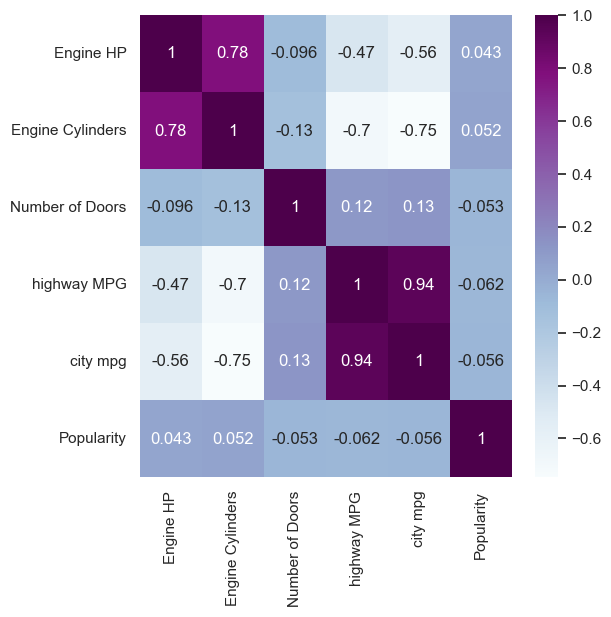

In [349]:
plt.figure(figsize = (6, 6))
numeric_columns = ['Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity']
heatmap_data = data[numeric_columns].corr()

sns.heatmap(heatmap_data, cmap = 'BuPu', annot = True)

## 2.8 Grouping on the basis of 'Year'

We would now be grouping on the basis of the year and check the 'highway MPG' in descending order so that we can know which year there was a good 'highway MPG' and so on. We see from the plot that in the year 2016, there is a higher value of 'highway MPG' respectively. We cannot easily seperate the values on the basis of year as there are so many years to be taken into consideration respectively. We were able to separate the average prices of the car on the basis of the year as we found that there are some cars of the years below 2000 that were considered to be low. Here, we cannot find such cases as there are cars even in the 90's that had high values of 'highway MPG' respectively. 

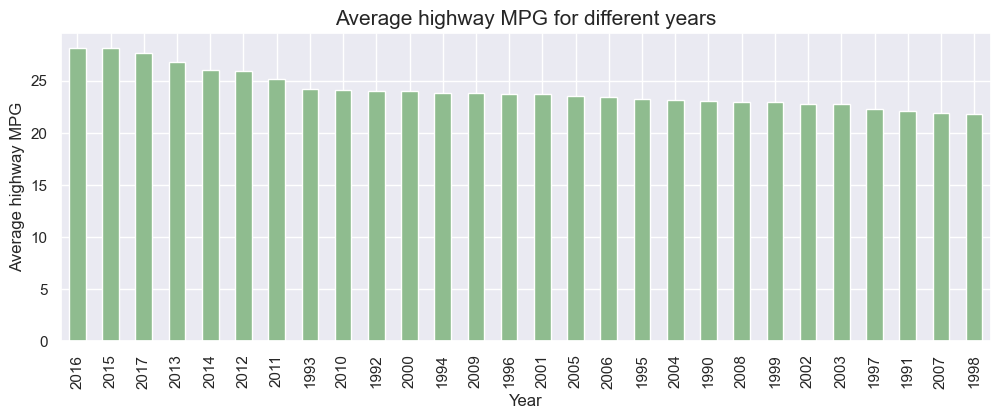

In [350]:
data['highway MPG'] = pd.to_numeric(data['highway MPG'], errors='coerce')

# Step 2: Drop rows where 'highway MPG' is NaN
data_cleaned = data.dropna(subset=['highway MPG'])

# Step 3: Plot the mean highway MPG for different years
plt.figure(figsize=(12, 4))
data_cleaned.groupby('Year')['highway MPG'].mean().sort_values(ascending=False).plot(kind='bar', color='darkseagreen')
plt.title("Average highway MPG for different years", fontsize=15)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average highway MPG", fontsize=12)
plt.show()

## Checking the NULL values

Now, it is time to check the null values and see if there are any missing data values. We see that there are a few features that have missing values. We see some features such as 'Engine Fuel Type' and 'Engine HP' that are missing. We have to fill those missing values as our machine learning model cannot deal with missing values though there are some algorithms that can solve the problem. 

In [351]:
data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              21
Engine Cylinders       20
Transmission Type       0
Driven_Wheels           0
Number of Doors         1
Market Category      3737
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

We would be calculating the median values of 'Number of doors' so that we can fill the missing values with the median value. 

In [352]:
data['Number of Doors'].median()

4.0

Here, we would be filling the missing values with the value 4 which is the median of the number of doors. 

In [353]:
data['Number of Doors'].fillna(4.0, inplace = True)

We would now be checking the missing values of 'Number of doors' and see if there are any values present. We see that there are 0 missing values present. 

In [354]:
data['Number of Doors'].isnull().sum()

0

## Creating a new column

We would now try to add a new feature which is used to calculate the difference between the present year and the year of manufacture of the car so that we can take into consideration the depreciation amount which can be done by the machine learning models. Therefore, we create a new column called 'Present Year' and we make it equal to 2021 respectively. We would then subtract the 'Year of manufacture' values with these values of the car so that we get the total number of years the car has been out. 

In [355]:
data['Present Year'] = 2021

We would be printing the head of the dataframe just to check the values that are present in it.

In [356]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Present Year
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,2021
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,2021
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,2021
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450,2021
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500,2021


Now it is the time to create a new column called 'Years of Manufacture' respectively. We would be doing the subtraction of the 'Present Year' from the 'Year' which is nothing but the year of manufacture. It would be better to plot the graph and see how the graph looks like in the notebook.

In [357]:
data['Years Of Manufacture'] = data['Present Year'] - data['Year']

Once we have the information, there is no need to have an additional column called 'Present Year' as that value is a constant. We would, therefore, delete the column as it is no longer needed. 

In [358]:
data.drop(['Present Year'], inplace = True, axis = 1)

## 2.9 Plotting the barplot of 'Years of Manufacture' 

We see that most of the values are about 6 years old. Therefore, we are working with young cars as there are some other cars in our data that are about 31 years old. These cars are very few in number. It is good to work with the most recent data points as the future would also be more relying and would be following the trend of the most recent data points into consideration. 

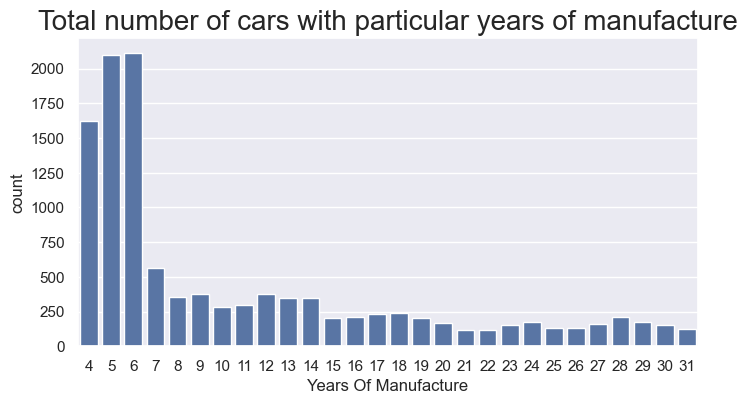

In [359]:
plt.figure(figsize = (8, 4))
sns.barplot(y = data['Years Of Manufacture'].value_counts(), x = data['Years Of Manufacture'].value_counts().index)
plt.title("Total number of cars with particular years of manufacture", fontsize = 20)
plt.show()

## Unique values in 'Engine Fuel Type'

We see that there are a few values that are present in 'Engine Fuel Types' and we would be taking those values into consideration respectively.

In [360]:
data['Engine Fuel Type'].unique()

array(['premium unleaded (required)', 'regular unleaded',
       'premium unleaded (recommended)', 'flex-fuel (unleaded/E85)',
       'diesel', 'flex-fuel (premium unleaded recommended/E85)',
       'natural gas', 'flex-fuel (premium unleaded required/E85)',
       'flex-fuel (unleaded/natural gas)', nan], dtype=object)

In [361]:
type("data['Engine Fuel Type'].mode()")

str

In [362]:
data['Engine Fuel Type'].fillna("data['Engine Fuel Type'].mode()", inplace = True)

In [363]:
data['Engine Fuel Type'].isnull().sum()

0

In [364]:
data.isnull().sum()

Make                       0
Model                      0
Year                       0
Engine Fuel Type           0
Engine HP                 21
Engine Cylinders          20
Transmission Type          0
Driven_Wheels              0
Number of Doors            0
Market Category         3737
Vehicle Size               0
Vehicle Style              0
highway MPG                0
city mpg                   0
Popularity                 0
MSRP                       0
Years Of Manufacture       0
dtype: int64

We would now be calculating the mean value of 'Engine HP' and understand it better. As could be seen from the graph, the 'Engine HP' is about 250 as can also be seen below. 

In [365]:
data['Engine HP'].mean()

250.75316672372475

We would now be checking the median values of 'Engine HP' and understand them better. We see that the value is about '230' respectively which is nothing but the median value. 

In [366]:
data['Engine HP'].median()

230.0

We are now going to fill the missing values with the median value so that it is more appropriate and accurate. And we have to make sure that inplace = True which means that the values that are replaced are permanent rather than getting temporary solutions in a variable. 

In [367]:
data['Engine HP'].fillna(data['Engine HP'].median(), inplace = True)

We now check the missing values in 'Engine HP' and see if there are any values present. We see that there are no mssing values that are present in 'Engine HP' respectively. 

In [368]:
data['Engine HP'].isnull().sum()

0

It is good to know the values that are present in 'Engine Cylinders' and see if there is any replacement. We see that there is an 'nan' value present in our data. We have to remove that point and replace it with some other value as missing values in machine learning could be costly and lead to some errors. Moreover, some machine learning algorithms cannot perform well too if there are any missing values. 

In [369]:
data['Engine Cylinders'].unique()

array([ 6.,  4.,  5.,  8., 12., 10.,  3., nan, 16.])

In [370]:
data['Engine Cylinders'].fillna(4, inplace = True)

We would once again check the missing values and see if there are values present in our features. We see that there is one feature with missing values namely 'Market Category' respectively. We would be removing that feature as there are many missing values and it seems as though we cannot make use of this feature anyways as it contains complex texts. Note that we might have used some natural language processing techniques (NLP) to solve the problem. However, it is not feasible here as the text is too complex and cannot find much of a value in it. 

In [371]:
data.isnull().sum()

Make                       0
Model                      0
Year                       0
Engine Fuel Type           0
Engine HP                  0
Engine Cylinders           0
Transmission Type          0
Driven_Wheels              0
Number of Doors            0
Market Category         3737
Vehicle Size               0
Vehicle Style              0
highway MPG                0
city mpg                   0
Popularity                 0
MSRP                       0
Years Of Manufacture       0
dtype: int64

Below we are dropping the 'Market Category' feature and making the inplace = True which shows that the feature is removed. 

In [372]:
data.drop(['Market Category'], inplace = True, axis = 1)

We once again check the missing values and see if there are any missing values in our data. We see that there are no missing values in our features. Therefore, now is the time to convert all these features into a mathematical format so that we would be able to perform the machine learning operations. 

In [373]:
data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        0
Engine HP               0
Engine Cylinders        0
Transmission Type       0
Driven_Wheels           0
Number of Doors         0
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
Years Of Manufacture    0
dtype: int64

We would see the information about the data and consider the type of feature that we are going to be dealing in machine learning respectively. We find that there are a few object features which must be converted to a mathematical form for the machine learning algorithm to read and understand them. 

In [374]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11705 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  11705 non-null  object 
 1   Model                 11705 non-null  object 
 2   Year                  11705 non-null  int64  
 3   Engine Fuel Type      11705 non-null  object 
 4   Engine HP             11705 non-null  float64
 5   Engine Cylinders      11705 non-null  float64
 6   Transmission Type     11705 non-null  object 
 7   Driven_Wheels         11705 non-null  object 
 8   Number of Doors       11705 non-null  float64
 9   Vehicle Size          11705 non-null  object 
 10  Vehicle Style         11705 non-null  object 
 11  highway MPG           11705 non-null  int64  
 12  city mpg              11705 non-null  int64  
 13  Popularity            11705 non-null  int64  
 14  MSRP                  11705 non-null  int64  
 15  Years Of Manufacture  11

We would find the unique values of 'Vehicle Size' and see the values that are associated with them. We see just 3 categorical features such as 'Compact', 'Midsize' and 'Large' respectively. 

In [375]:
data['Vehicle Size'].unique()

array(['Compact', 'Midsize', 'Large'], dtype=object)

We would also see the vehicle style and the categories that are associated with them. We see a lot of categories and we would have to be working with them and understand and convert them into the form of integers before working with them. 

In [376]:
data['Vehicle Style'].unique()

array(['Coupe', 'Convertible', 'Sedan', 'Wagon', '4dr Hatchback',
       '2dr Hatchback', '4dr SUV', 'Passenger Minivan', 'Cargo Minivan',
       'Crew Cab Pickup', 'Regular Cab Pickup', 'Extended Cab Pickup',
       '2dr SUV', 'Cargo Van', 'Convertible SUV', 'Passenger Van'],
      dtype=object)

# 3. Manipulation of Data 

Now, it is time to manipulate the data and convert it in the forms where we could give it for the machine learning models for predictions. We use various libraries in python such as shuffle that are used to choose various data values that would later be given to the machine learning models. There is a requirement to also encode the text information that is present so that those values are converted to mathematical vectors that would ensure that they would be understood by the algorithms respectively. 

## 3.1 Shuffling the data

Most of the machine learning projects that I've seen do not make use of shuffle feature in python. It is very important to shuffle the data randomly so that we get outputs differently and we would be dealing with data without any particular order or a particular timeframe. 

In [377]:
shuffled_data = shuffle(data, random_state = 100)
X = shuffled_data.drop(['MSRP'], axis = 1)
y = shuffled_data['MSRP']

## 3.2 Dividing the data into training and testing set

We would be dividing the data into training data and testing data. Since we have a lot of data points, it would be better to randomly divide the data so that the test set just contains 20 percent of the values. Since the total number of data points that we have taken into consideration are about 10000, it would be wise to divide the training and testing set in the ratio 80:20 percent. In general, we would be diving the training and testing set so that the value that is present in the training set is about 30 percent of the total data. 

In [378]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

We would be printing the format of the data and see how the values are divided. We see that the total number of rows on the training set are about 9364 respectively. We also see that the total number of rows on the test set are about 2341 respectively. These values can be seen here. 

In [379]:
print("The size of the input train data is: {}".format(X_train.shape))
print("The size of the output train data is: {}".format(y_train.shape))
print("The size of the input test data is: {}".format(X_test.shape))
print("The size of the output test data is: {}".format(y_test.shape))

The size of the input train data is: (9364, 15)
The size of the output train data is: (9364,)
The size of the input test data is: (2341, 15)
The size of the output test data is: (2341,)


## 3.3 Encoding the data

When we are doing any machine learning applications, it is important to encode the data so that we would be able to convert the data in the form of categorical features so that we would be working on the data that is mathematical rather than categorical. Therefore, we would be converting the categorical feature into numerical features so that we are going to be using the mathematical vectors for our machine learning applications. 

There are different encoding techniques that we would be taking into consideration and we are making sure that we get the best output values associated with each of them. You can check out the link below to see the different encoding techniques to convert the cateogrical values into numerical features respectively. 

https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/

In [380]:
encoder = TargetEncoder(cols = 'Year')

In [381]:
X_train.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,Years Of Manufacture
1354,Oldsmobile,Alero,2003,regular unleaded,140.0,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,30,21,26,18
896,Saab,900,1997,regular unleaded,185.0,4.0,MANUAL,front wheel drive,2.0,Compact,2dr Hatchback,25,18,376,24
2635,Chevrolet,C/K 1500 Series,1997,regular unleaded,200.0,6.0,MANUAL,four wheel drive,2.0,Large,Regular Cab Pickup,18,14,1385,24
11165,Aston Martin,V8 Vantage,2015,premium unleaded (required),430.0,8.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,19,13,259,6
2554,Honda,Civic,2015,regular unleaded,143.0,4.0,AUTOMATIC,front wheel drive,4.0,Compact,Sedan,39,30,2202,6


We would be doing the target encoding here where we would replace the values with the average values of the 'MSRP' whenever we find a value associated with it. This would make it easier for the machine learning model as we are already giving the output values to it so that there is no need to encode further. 

In [382]:
encoder.fit(X_train['Year'], y_train.to_frame()['MSRP'] )


TargetEncoder(cols=['Year'])

We would be transforming the value so that we are now converting the column so that we get the most desired output respectively. 

In [383]:
X_train['Year'] = encoder.transform(X_train['Year'])


We should also make sure that the values that we have taken into consideration and transforming should be with respect to the training set. We should not replace those values with the test output as it would lead to data leakage respectively. 

In [384]:
X_test['Year'] = encoder.transform(X_test['Year'])

In [385]:
X_train.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,Years Of Manufacture
1354,Oldsmobile,Alero,36784.190660,regular unleaded,140.0,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,30,21,26,18
896,Saab,900,2558.613101,regular unleaded,185.0,4.0,MANUAL,front wheel drive,2.0,Compact,2dr Hatchback,25,18,376,24
2635,Chevrolet,C/K 1500 Series,2558.613101,regular unleaded,200.0,6.0,MANUAL,four wheel drive,2.0,Large,Regular Cab Pickup,18,14,1385,24
11165,Aston Martin,V8 Vantage,46953.929157,premium unleaded (required),430.0,8.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,19,13,259,6
2554,Honda,Civic,46953.929157,regular unleaded,143.0,4.0,AUTOMATIC,front wheel drive,4.0,Compact,Sedan,39,30,2202,6


We would be doing the same set of steps for other models and we would be taking those values into consideration from our data set. 

In [386]:
encoder = TargetEncoder(cols = 'Model')
encoder.fit(X_train['Model'], y_train.to_frame()['MSRP'])
X_train['Model'] = encoder.transform(X_train['Model'])
X_test['Model'] = encoder.transform(X_test['Model'])


In [387]:
X_train.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,Years Of Manufacture
1354,Oldsmobile,30176.543012,36784.190660,regular unleaded,140.0,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,30,21,26,18
896,Saab,25245.937696,2558.613101,regular unleaded,185.0,4.0,MANUAL,front wheel drive,2.0,Compact,2dr Hatchback,25,18,376,24
2635,Chevrolet,5061.892819,2558.613101,regular unleaded,200.0,6.0,MANUAL,four wheel drive,2.0,Large,Regular Cab Pickup,18,14,1385,24
11165,Aston Martin,97860.899828,46953.929157,premium unleaded (required),430.0,8.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,19,13,259,6
2554,Honda,22687.787683,46953.929157,regular unleaded,143.0,4.0,AUTOMATIC,front wheel drive,4.0,Compact,Sedan,39,30,2202,6


Same operation is being performed here as well as can be seen below. 

In [388]:
encoder = TargetEncoder(cols = 'Make')
encoder.fit(X_train['Make'], y_train.to_frame()['MSRP'])
X_train['Make'] = encoder.transform(X_train['Make'])
X_test['Make'] = encoder.transform(X_test['Make'])

In [389]:
X_train.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,Years Of Manufacture
1354,10812.757938,30176.543012,36784.190660,regular unleaded,140.0,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,30,21,26,18
896,28423.023983,25245.937696,2558.613101,regular unleaded,185.0,4.0,MANUAL,front wheel drive,2.0,Compact,2dr Hatchback,25,18,376,24
2635,28230.392090,5061.892819,2558.613101,regular unleaded,200.0,6.0,MANUAL,four wheel drive,2.0,Large,Regular Cab Pickup,18,14,1385,24
11165,196884.138144,97860.899828,46953.929157,premium unleaded (required),430.0,8.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,19,13,259,6
2554,26660.798742,22687.787683,46953.929157,regular unleaded,143.0,4.0,AUTOMATIC,front wheel drive,4.0,Compact,Sedan,39,30,2202,6


## 3.4 One Hot Encoding 

Now we would be making use of the one hot encoding. One hot encoding is a technique where each category in a feature is converted into a feature and set to 1 once the particular value is present in the data. 

In [390]:
encoder = OneHotEncoder()
encoder.fit(X_train[['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style']])
one_hot_encoded_output_train = encoder.transform(X_train[['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style']])
one_hot_encoded_output_test = encoder.transform(X_test[['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style']])

We would concatenate the features with the X_train and X_test and remove the actual categorical features as they should not be given to the machine learning algorithms respectively. 

In [391]:
X_train = pd.concat([X_train, one_hot_encoded_output_train], axis = 1)
X_test = pd.concat([X_test, one_hot_encoded_output_test], axis = 1)

In [392]:
X_train.drop(['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style'], axis = 1, inplace = True)
X_test.drop(['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style'], axis = 1, inplace = True)

We would check the info of the data and see the values that are present in the data. We see that there are only float and int values rather than objects. We see that we can give this to the machine learning algorithm for implementation. 

In [393]:
#X_train.info()
X_train.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,Years Of Manufacture,...,Vehicle Style_7,Vehicle Style_8,Vehicle Style_9,Vehicle Style_10,Vehicle Style_11,Vehicle Style_12,Vehicle Style_13,Vehicle Style_14,Vehicle Style_15,Vehicle Style_16
1354,10812.757938,30176.543012,36784.190660,140.0,4.0,4.0,30,21,26,18,...,0,0,0,0,0,0,0,0,0,0
896,28423.023983,25245.937696,2558.613101,185.0,4.0,2.0,25,18,376,24,...,0,0,0,0,0,0,0,0,0,0
2635,28230.392090,5061.892819,2558.613101,200.0,6.0,2.0,18,14,1385,24,...,0,0,0,0,0,0,0,0,0,0
11165,196884.138144,97860.899828,46953.929157,430.0,8.0,2.0,19,13,259,6,...,0,0,0,0,0,0,0,0,0,0
2554,26660.798742,22687.787683,46953.929157,143.0,4.0,4.0,39,30,2202,6,...,0,0,0,0,0,0,0,0,0,0


In [394]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9364 entries, 1354 to 2564
Data columns (total 47 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  9364 non-null   float64
 1   Model                 9364 non-null   float64
 2   Year                  9364 non-null   float64
 3   Engine HP             9364 non-null   float64
 4   Engine Cylinders      9364 non-null   float64
 5   Number of Doors       9364 non-null   float64
 6   highway MPG           9364 non-null   int64  
 7   city mpg              9364 non-null   int64  
 8   Popularity            9364 non-null   int64  
 9   Years Of Manufacture  9364 non-null   int64  
 10  Engine Fuel Type_1    9364 non-null   int64  
 11  Engine Fuel Type_2    9364 non-null   int64  
 12  Engine Fuel Type_3    9364 non-null   int64  
 13  Engine Fuel Type_4    9364 non-null   int64  
 14  Engine Fuel Type_5    9364 non-null   int64  
 15  Engine Fuel Type_6    9

## 3.5 Standardization and Normalization of data

We would be considering the values of our data and perform some operations such as standardization and normalization before giving the data to the machine learning algorithms. We would be transforming the features that are present in the data and convert the values using the minmaxscaler respectively. 

### MinMaxScaler Normalization Formula

The `MinMaxScaler` scales each feature to a given range, typically [0, 1]. The formula is:

 $$X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}$$

where:
- $X$ is the original value.
- $X_{\text{min}}$ is the minimum value of the feature.
- $X_{\text{max}}$ is the maximum value of the feature.
- $X_{\text{scaled}}$ is the scaled value.

Steps:
1. Subtract the minimum value of the feature from the original value. This shifts the data such that the minimum value of the feature becomes 0.
2. Divide the result by the range (maximum value minus the minimum value) of the feature. This scales the data to the range [0, 1].


In [395]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_new = scaler.transform(X_train)
X_test_new = scaler.transform(X_test)

In [396]:
X_train_new.shape

(9364, 47)

We would create an empty list and we would be appending the values later so that we can analyze different machine learning algorithms for deployment. 

In [397]:
error_mean_square = []
error_mean_absolute = []

# 4. Machine Learning Analysis

In this section, we are going to be performing the machine learning analysis where we use different machine learning models and see how well they perform on the test set. Let us consider their performances and plot them using various plots such as regplots and barplots respectively. With this analysis, we can conclude the performance of different machine learning models and select the best machine learning model for our problem. Therefore, let us dive into this section and see the overall performance of the models for car prices prediction. 

## 4.1 Linear Regression 

We would now be working with linear regression model and understand the data fully. We see that one of the best ways for predicting the regression values or the continuous output is to use linear regression as it is straightforward. We have to first give the training data including the training output. We have to first fit the model with that data and understand the parameters. After we fit the model, we have to train the model using the machine learning predictions to get the output. We have to later compare the values from the actual values with the predicted values to get the output. We have to be using various machine learning metrics what are used for evaluation. 

In the same way, we would be working with a few machine learning models and get their outputs and compare the values using the metrics to see which algorithm performs the best. 

In [398]:
model = LinearRegression()
model.fit(X_train_new, y_train)

LinearRegression()

Here, we would be using predict to predict the test set values and store those values in y_predict which would later be used for comparison. 

In [399]:
y_predict = model.predict(X_test_new)

We would be storing the results in error_mean_square and error_mean_absolute as they are lists. We would later be plotting the outputs and see how well the machine learning models did in the test set. 

In [400]:
error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))

We see that there is a value appended in the list below.

In [401]:
error_mean_absolute

[13328]

One of the interesting things that we would be doing is to create a dataframe containing the predicted valeus and the actual values and draw a plot so that we can see how the output is actually different from the predictions. 

In [402]:
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])

We would be looking at the head of the dataframe and understand the data better. 

In [403]:
y_predict.head()

,Predicted Output
0,11456.0
1,17280.0
2,70912.0
3,28672.0
4,305344.0


We would also take the testing set values and see how they actually are respectively.

In [404]:
y_test.to_frame().head()

,MSRP
8780,24660
674,2000
6569,49770
11368,20875
3548,284976


Here, we would be concatenating the y_predict values an the y_test values and see how well the machine learning models perform. 

In [405]:
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

Below, we can see the concatenated output and see the output

In [406]:
results.head()

,Predicted Output,MSRP
0,11456.0,24660
1,17280.0,2000
2,70912.0,49770
3,28672.0,20875
4,305344.0,284976


## 4.1.1 Regplot for Linear Regression Output

We would be using the seaborn's regplot to better understand how the data is spread. We see how the values are spread out and get a good understanding. We can understand from the plot that the predictions were very close to the actual values that we have considered. Therefore, linear regression did a good job in giving the regression values and can be used for predictions in the future. However, it is also better to test other machine learning models and see how well they do so that we can finally decide the best model that could be used for deployment. 

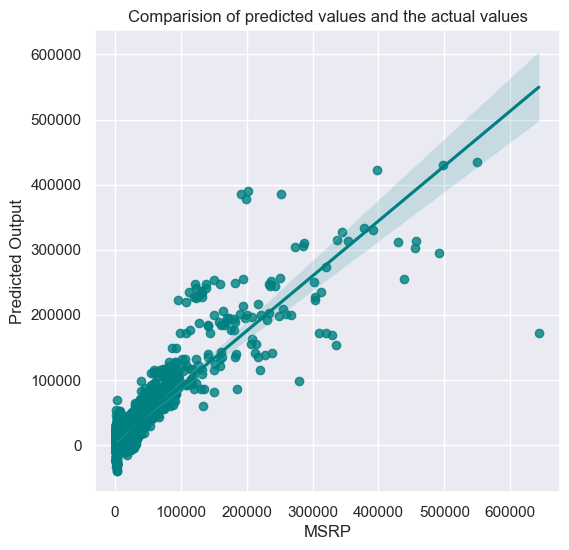

In [409]:
plt.figure(figsize = (6, 6))
sns.regplot(data = results, y = 'Predicted Output', x = 'MSRP', color = 'teal', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 12)
plt.show()

## 4.2 Support Vector Regressor

We would now be working with a new machine learning model called support vector regressor. We would be plotting the regplot and understand the predictions. Support Vector Regressor comes from Support Vector Machines and we would just be changed the kernel so that it would perform the regression tasks.

In [418]:
model = SVR()
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

## 4.2.1 Regplot for Support Vector Regressor

We would now be plotting and understanding the support vector regressor in detail. We see the output values that are not so close to the actual values. This makes us conclude that support vector regressor cannot be used in our use case respectively. We can tell from the plot below that some of the predictions were way too far from the actual output. Therefore, the margin for error is high in this machine learning model. 

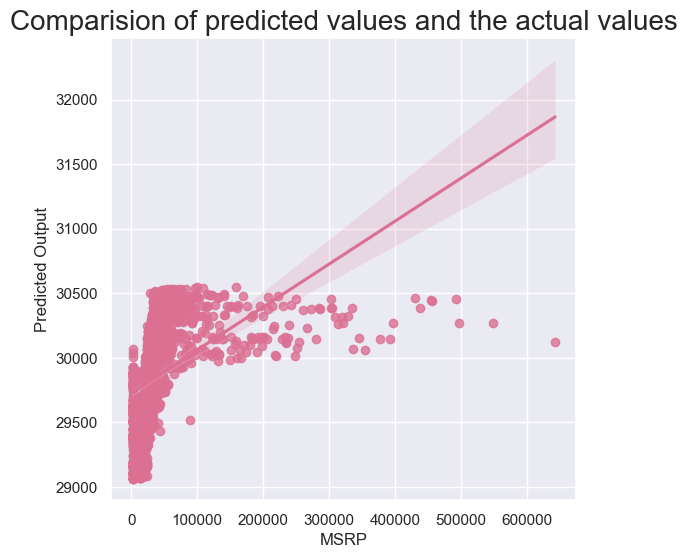

In [421]:
plt.figure(figsize = (6, 6))
sns.regplot(data = results, y = 'Predicted Output', x = 'MSRP', color = 'palevioletred', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

We would be again appending those values of the metrics and store them in a list for plotting later.

In [422]:
error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))

## 4.3 K - Neighbors Regressor 

We would be using the knn regressor and understand the output. We would be drawing a regplot to get an understanding of how the data is spread out. 

In [423]:
model = KNeighborsRegressor(n_neighbors = 2)
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

## 4.3.1 Regplot for K - Neighbors Regressor

We would be making use of the regplot again and plotting the predicted values and the actual predicted output values. We see that K - Neighbors Regressor did well in the testing set as compared to Support Vector Regressor respectively.We see that most of the predictions are close to the actual outputs in the plot below. There are just a few points that were not completely accurate and the margin error is high. But ther is not a lot of error for the remaining predictions as can be seen below. 

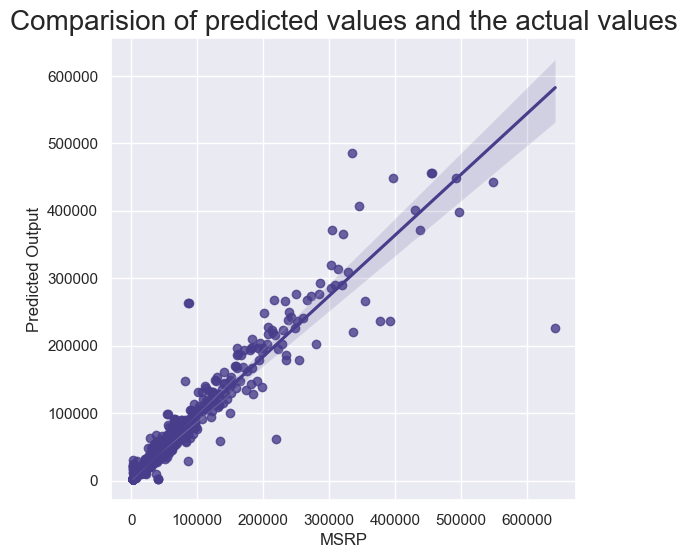

In [424]:
plt.figure(figsize = (6, 6))
sns.regplot(data = results, y = 'Predicted Output', x = 'MSRP', color = 'darkslateblue', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

We would be using the metrics that we have seen and storing those values in a list. We would append the elements and form a list. 

In [425]:
error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))

## 4.4 PLS Regression

We would also be using this novel PLS Regression technique to make the predictions.

In [426]:
model = PLSRegression(n_components = 20)
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

## 4.4.1 Regplot for PLS Regression
Partial Least Squares PLS regression scatterplot is also good as compared to Support Vector Regressor. It actually did well in giving the continuous values prediction and can be used in later projects. 

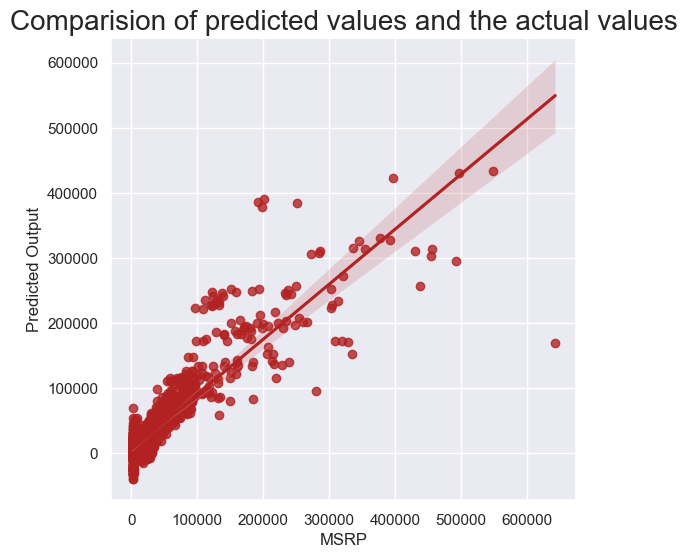

In [429]:
plt.figure(figsize = (6, 6))
sns.regplot(data = results, y = 'Predicted Output', x = 'MSRP', color = 'firebrick', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

We would be appending the error metric in the list that we have created. 

In [430]:
error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))

## 4.5 Decision Tree Regressor

We would making use of decision tree regressor and make the split to be random. We would be fitting the training data to it and make the predictions later for the test data to get an understanding of how the algorithm did in the test set. 

In [431]:
model = DecisionTreeRegressor(splitter = 'random')
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

## 4.5.1 Regplot for Decision Tree Regressor

We would be making use of Decision Tree Regressor and understand the outputs respectively. We see that decision tree regressor also does a very good job of predicting the right outputs for the test inputs. Therefore, this model can be deployed in production. In additon to this, we have to do the hyperparameter tuning so that we would be able to get the best output for this model. 

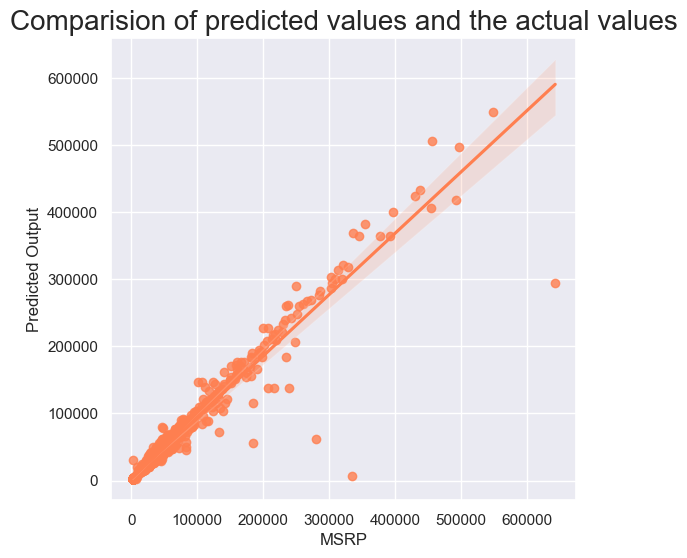

In [432]:
plt.figure(figsize = (6, 6))
sns.regplot(data = results, y = 'Predicted Output', x = 'MSRP', color = 'coral', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

We would be appending the values to the list that we have created before.

In [433]:
error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))

## 4.6 Gradient Boosting Regressor

We would be making use of gradient boosting regressor respectively. We would follow the same procedure of traning the data and getting test output and see how well the model did on the test set. There can be a few hyperparameters that we would need to tune. But it would be better to see how the model actually performs with it's default values of hyperparameters respectively.

In [434]:
model = GradientBoostingRegressor()
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

## 4.6.1 Regplot of Gradient Boosting Regressor 

We would now be using the gradient boosting regressor and plot the values and get a scatterplot respectively. We see that the gradient boosting regressor also did a fine job in getting the most accurate predictions. There could be a few outliers in the predictions but they are few in number. Most of the points were accurately predicted with small errors in them. Therefore, this is also a good model that could be used for predictions.

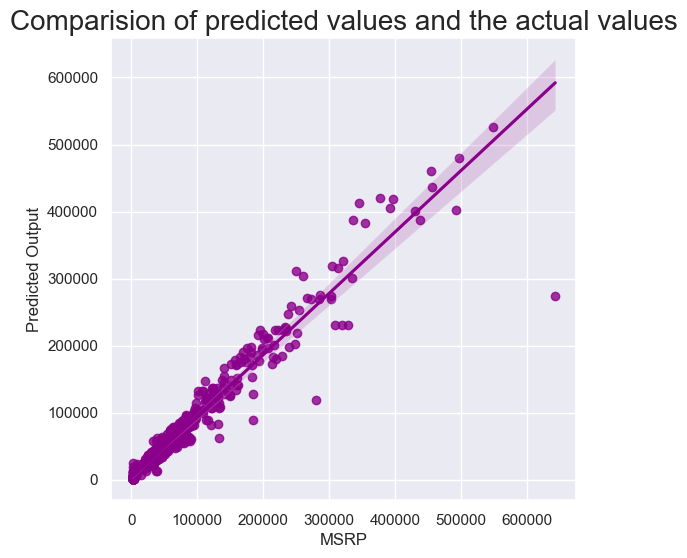

In [435]:
plt.figure(figsize = (6, 6))
sns.regplot(data = results, y = 'Predicted Output', x = 'MSRP', color = 'darkmagenta', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

We would make use of the list and append the errors so that we could plot them later. 

In [436]:
error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))

## 4.7 MLP Regressor

We would make use of the MLP Regressor which is the neural network for predictions. We would be taking into account 50 hidden layer sizes and an alpha values equal to 0.001 respectively. We have different types of learning rates that we could be using but here, let us stick on to 'adaptive' respectively. 

In [438]:
model = MLPRegressor(hidden_layer_sizes = 50, alpha = 0.001, solver = 'lbfgs', learning_rate = 'adaptive')
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

## 4.7.1 Regplot of MLP Regressor

We would be using the MLP regressor scatterplot and plot the actual output values with the predicted output values respectively so that we get a good understanding of the machine leanring model. We can see that this model also does a very fine job in predicting the outputs. Therefore, we would have to now plot the mean square error and mean absolute error of the different machine learning algorithms that we have used till now and understand those values. Based on those values, we can further conclude the best machine learning model that could be used for deployment. We have to be doing the hyperparameter tuning after finding the best model. However, it is a complicated step as we have to take into consideration different hyperparameters and get the accuracy values for different values and plot them. Since we are not participating in any competitions, it would be wise to just find the best machine learning model and conclude our understanding respectively. 

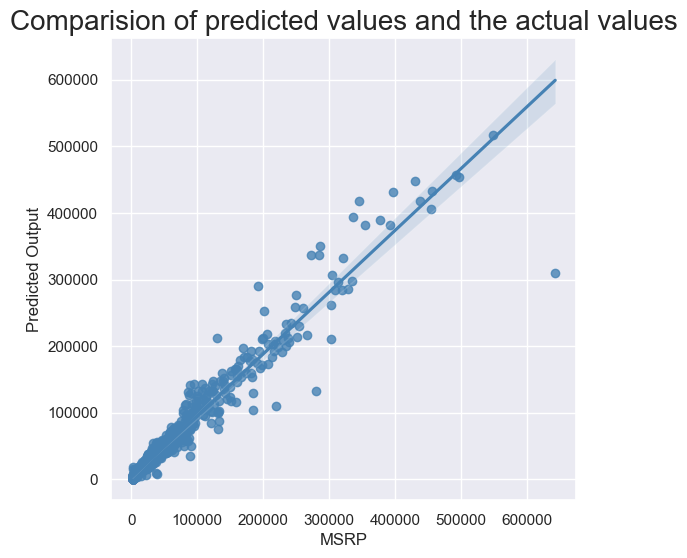

In [440]:
plt.figure(figsize = (6, 6))
sns.regplot(data = results, y = 'Predicted Output', x = 'MSRP', color = 'steelblue', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

We would be appending the values to the list that we have created so that they could be used for plotting later on. 

In [441]:
error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))

## 4.8 Dataframe of Machine Learning Models

Now it is time to get to the end. We would now be using the models that we have just created and making a dataframe. We would append the list values that we have been appending the error values and make a dataframe containing the models and the errors associated with them. 

In [443]:
data = {
    'Models':
        ['Linear Regression', 'Support Vector Regressor', 'K Nearest Regressor', 'PLS Regression', 'Decision Tree Regressor', 'Gradient Boosting Regressor', 'MLP Regressor'], 
    'Mean Absolute Error': error_mean_absolute, 
    'Mean Squared Error': error_mean_square
        }
model_dataframe = pd.DataFrame(data)

We could have a look at the machine learning models dataframe that we have just created respectively.

In [444]:
model_dataframe

,Models,Mean Absolute Error,Mean Squared Error
0,Linear Regression,13328,597658109
1,Support Vector Regressor,22348,2644288584
2,K Nearest Regressor,4625,222649547
3,PLS Regression,13252,596713700
4,Decision Tree Regressor,3575,169433885
5,Gradient Boosting Regressor,4363,136184711
6,MLP Regressor,4948,142232590


## 4.9 (a) Barplot of machine learning models with mean absolute error 

We would be making use of the mean absolute error and understand the data fully. We see that the mean absolute error for the machine learning model 'Support Vector Regressor' is the highest. We could also understand this from the above scatterplot of 'Support Vector Regressor' respectively. We also see from the graph that the 'Decision Tree Regressor' has the lowest mean absolute error. We can conclude that it is better to use the 'Decision Tree Regressor' for deploying and for predictions in the future as it has the lowest mean absolute error. 

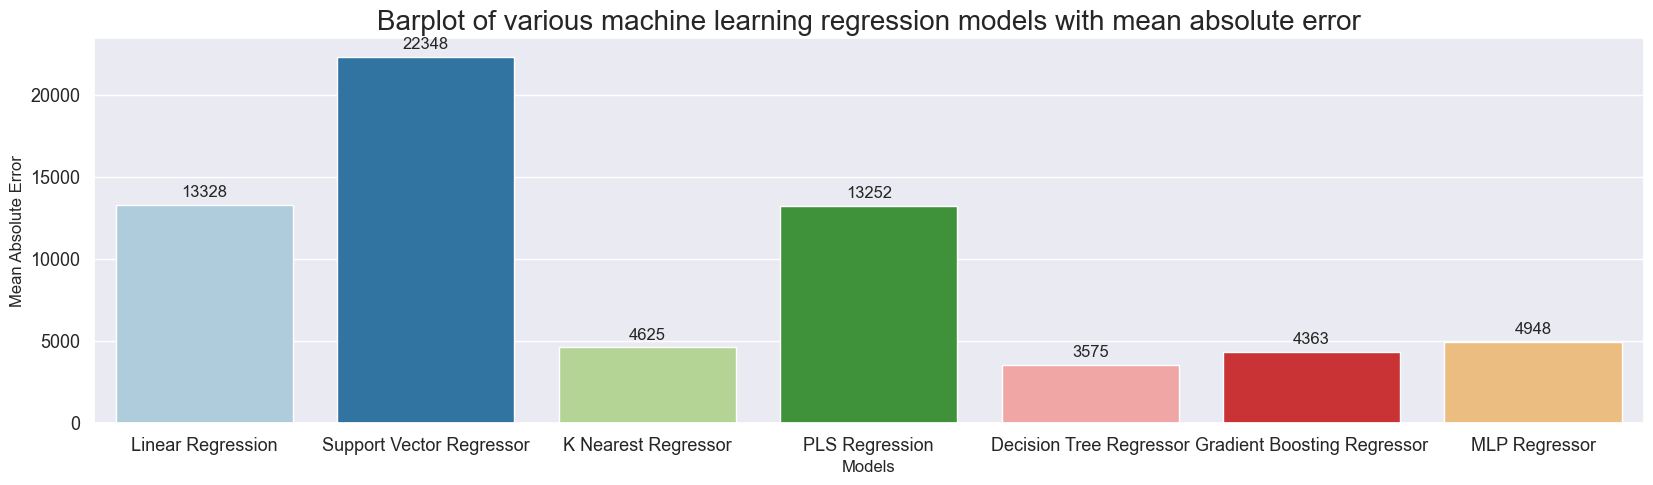

In [453]:
plt.figure(figsize = (20, 5))
splot = sns.barplot(data = model_dataframe, x = 'Models', y = 'Mean Absolute Error', palette = 'Paired')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title("Barplot of various machine learning regression models with mean absolute error", fontsize = 20)
plt.show()

## 4.9 (b) Barplot of machine learning models with mean squared error

We would now be plotting the barplot of various machine learning models by taking into consideration the mean squared error respectively. We can see from the graph that 'Decision Tree Regressor' has the lowest mean squared error respectively. Therefore, it is one of the best models to use as there is low error for the testing set. We have to always compare different machine learning models and understand how the values are shaped respectively. There might be different machine learning models that would perform differently for different scenarios and different data sets respectively. 

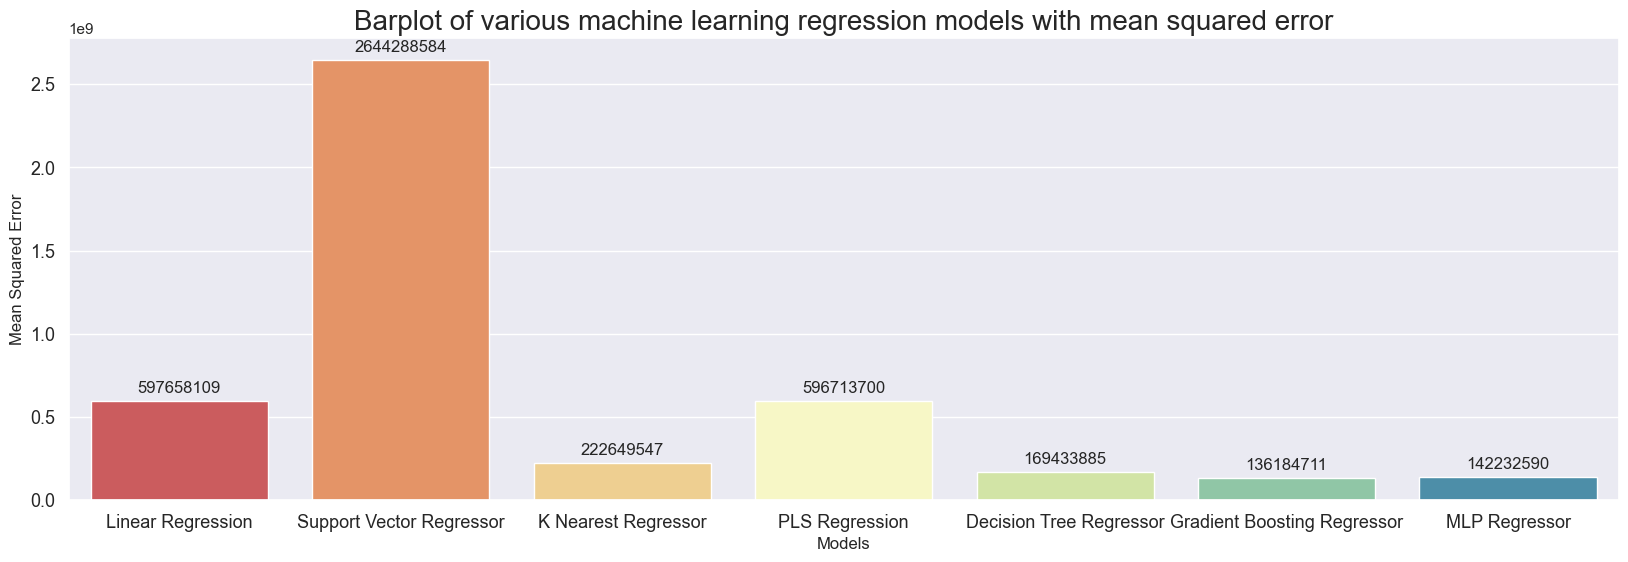

In [455]:
plt.figure(figsize = (20, 6))
splot = sns.barplot(data = model_dataframe, x = 'Models', y = 'Mean Squared Error', palette = 'Spectral')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title("Barplot of various machine learning regression models with mean squared error", fontsize = 20)
plt.show()

## 5. Conclusion

1. We can see that using different machine learning models would lead to different values of mean absolute error and mean squared error respectively.
2. We would have to first convert all the categorical features into numerical features before we give those data points to the machine learning models for prediction. If we just give categorical features directly, there would be an error in the machine learning models respectively. 
3. It is always good to shuffle the data before we split the data into training and testing set. This is done so that we have more randomness in the training data so that the machine learning models would work well on new data.
4. We have to always ensure that there are no missing values in our data. We have to replace those values so that there is no problem when we are using different machine learning models for prediction. 
5. We have to also remove the outliers in our data as they would completely change some of the important predictions and lead to an increase in the error respectively. 